In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt


# Load the data
data = pd.read_csv('hotel_booking.csv')
pre_processed_data=data
# Describe the data
data.describe()
# Get information about the data
hotel_data_info = data.info()
# Display the number of missing values in each column sorted in ascending order
print(f"Number of nulls per column: {data.isnull().sum().sort_values(ascending=False)}")

print(f"Number of duplicate rows: {data.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Assign a placeholder for missing values
data.fillna(value={'children': -1, 'country': 'Missing', 'agent': 'Missing', 'company': 'No Company'}, inplace=True)
data.info()
print(f"Number of nulls per column: {data.isnull().sum().sort_values(ascending=False)}")


In [ ]:
# Separate columns into categorical and numerical
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the separated columns
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)

# Check the data types of each column
print(data.dtypes)
data.info()


In [92]:


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert non-numeric columns to values
for column in categorical_columns:
    # Convert the column to string type to avoid type conflicts
    data[column] = data[column].astype(str)
    # Apply LabelEncoder
    data[column] = label_encoder.fit_transform(data[column])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [26]:
print(data['is_canceled'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: is_canceled
Non-Null Count   Dtype
--------------   -----
119390 non-null  int64
dtypes: int64(1)
memory usage: 932.9 KB
None


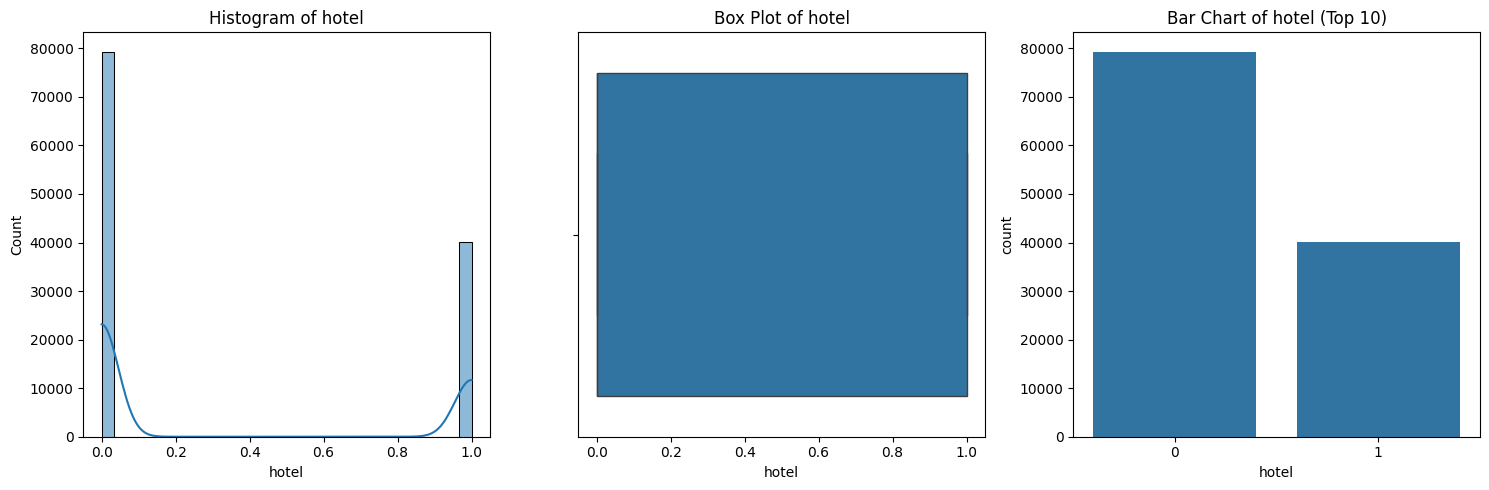

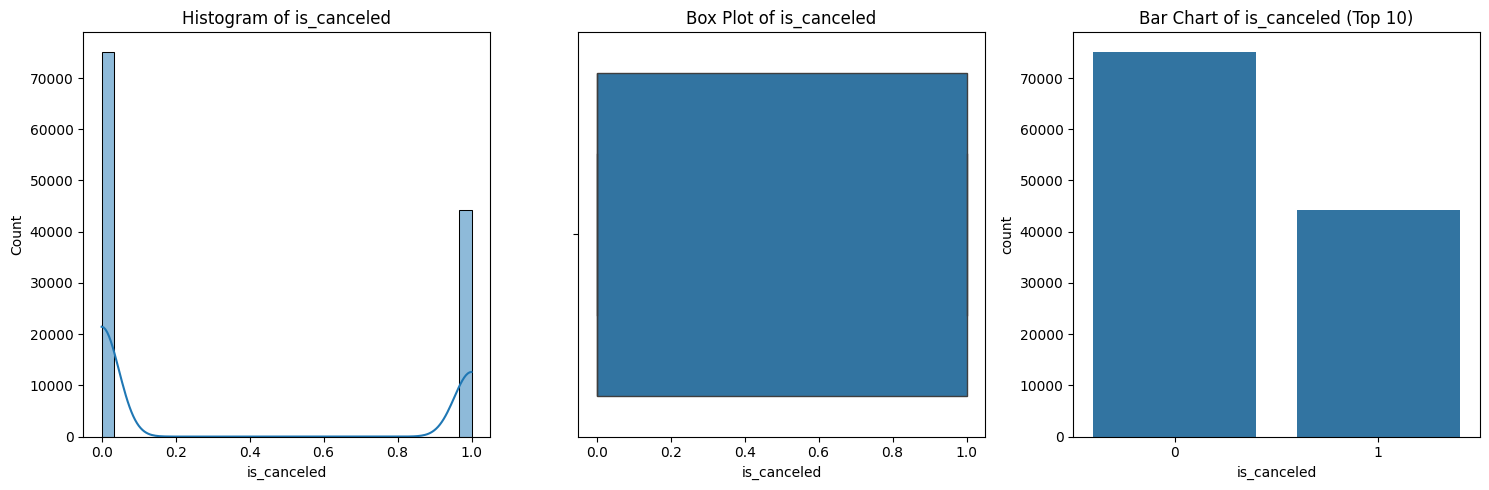

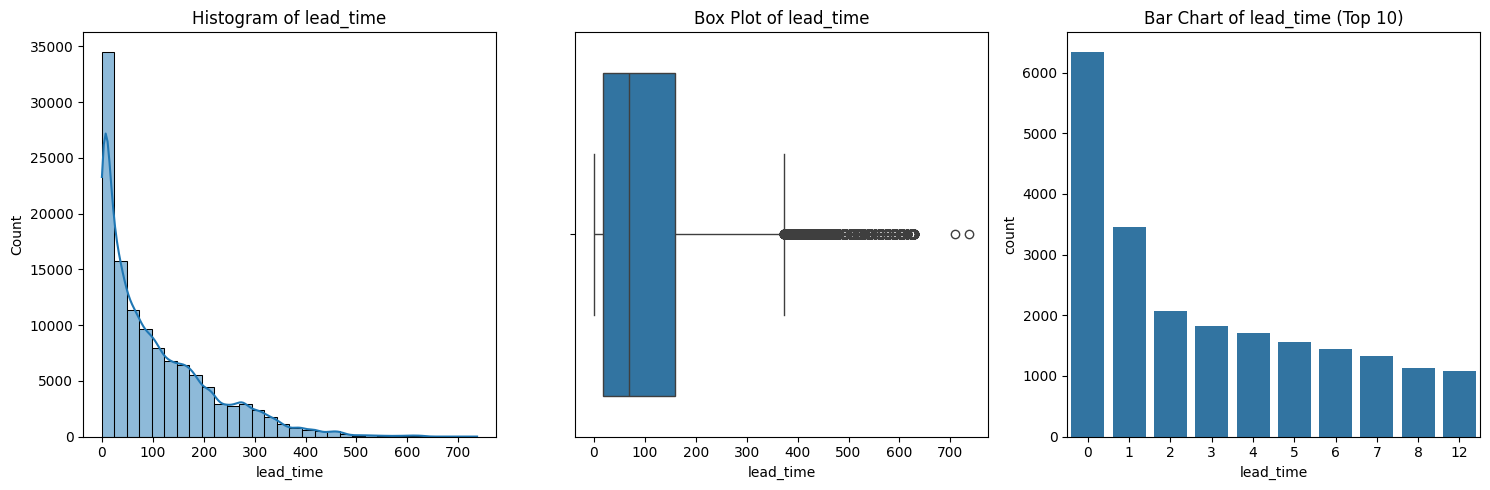

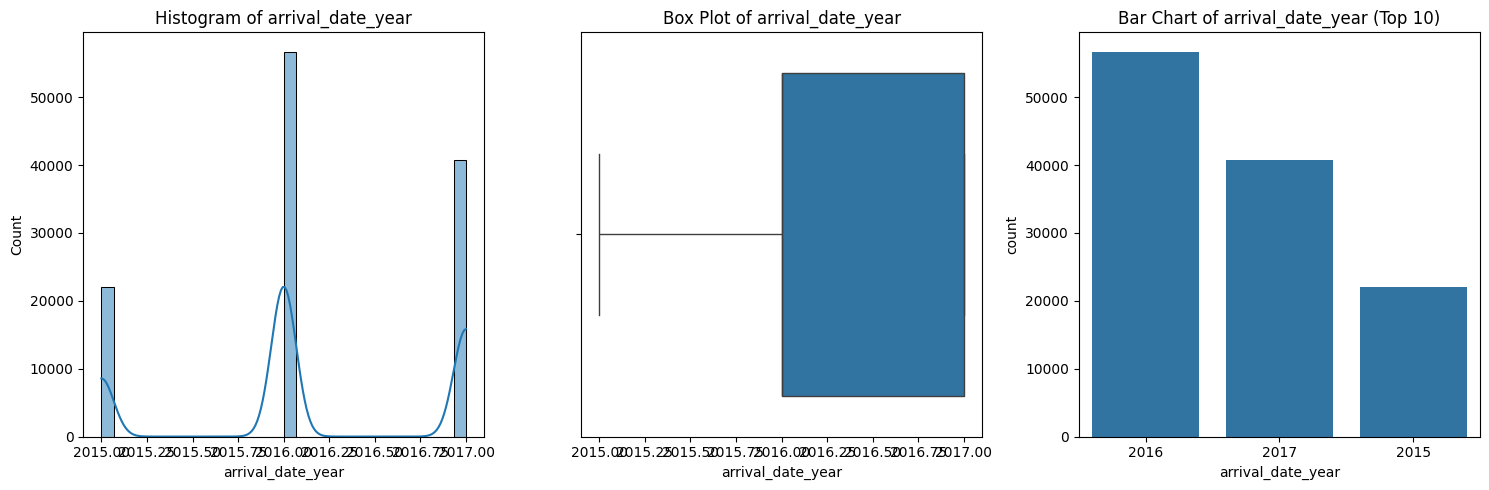

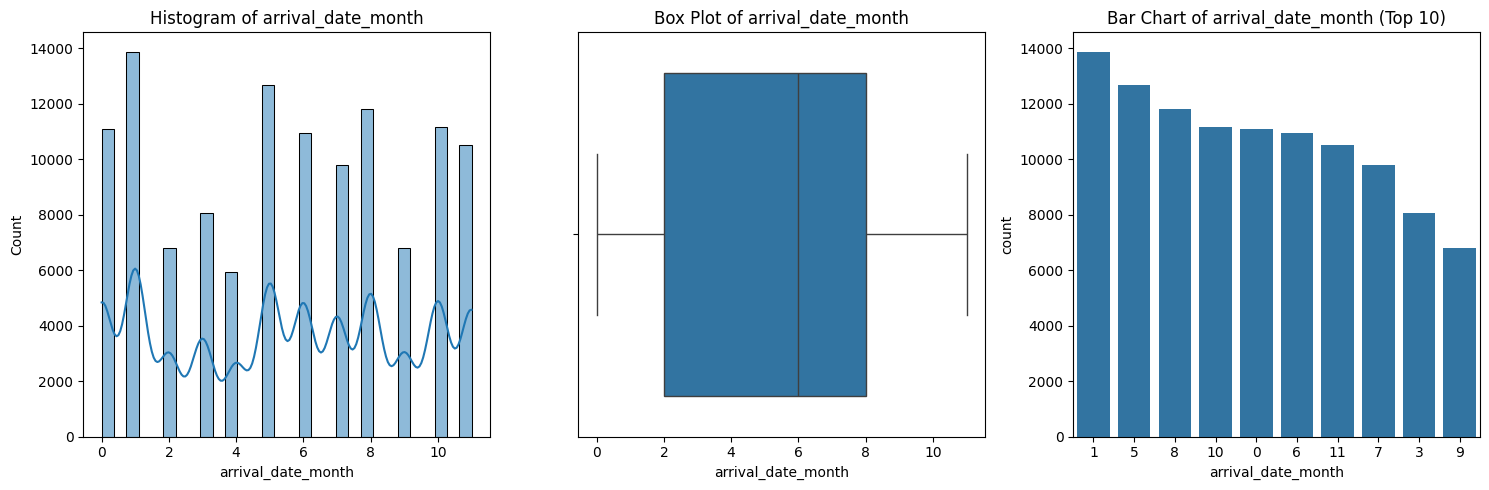

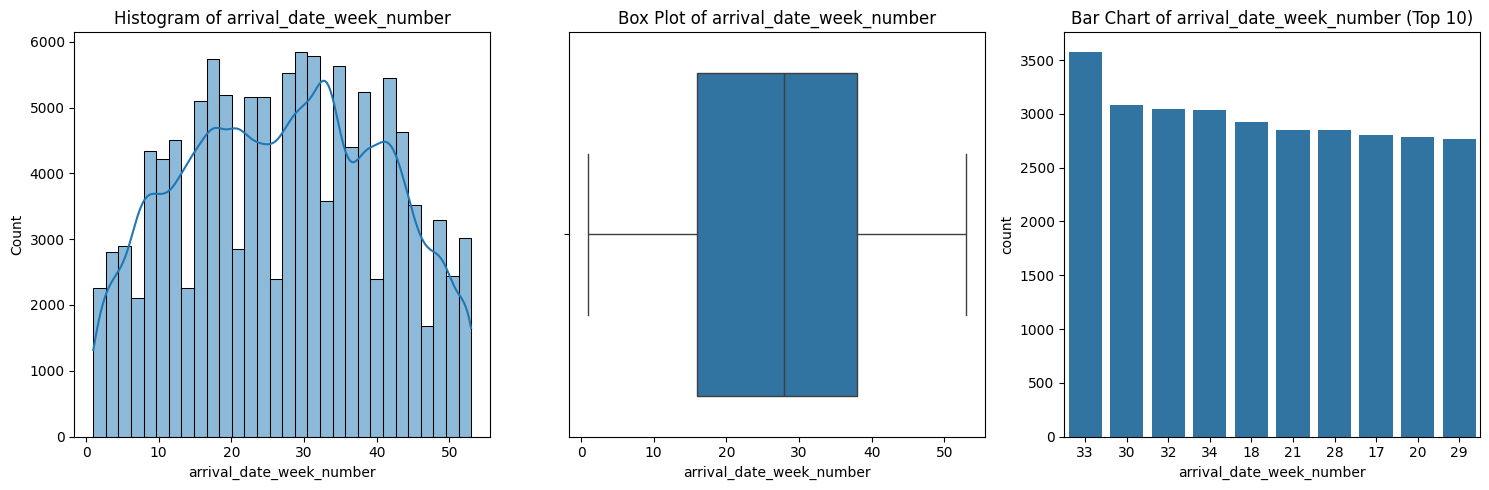

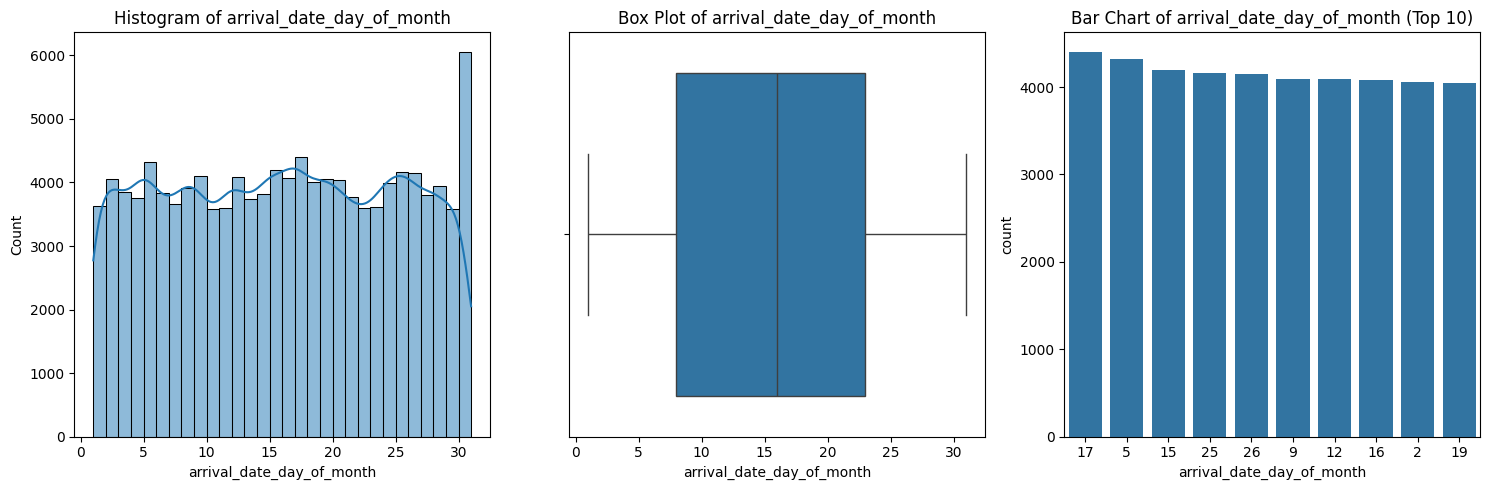

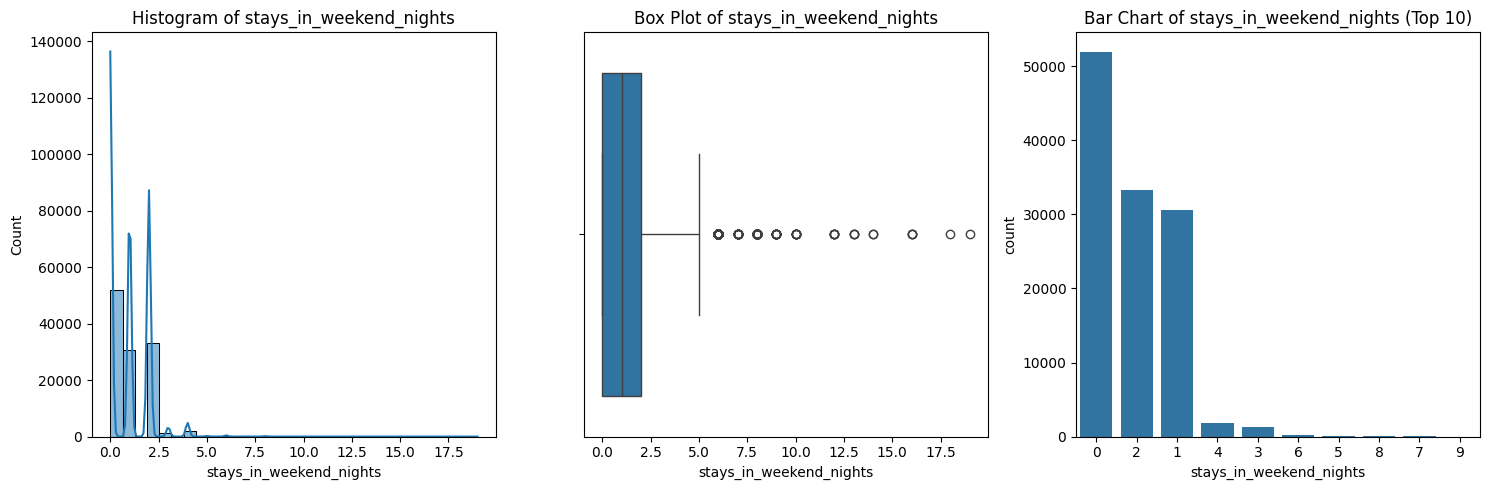

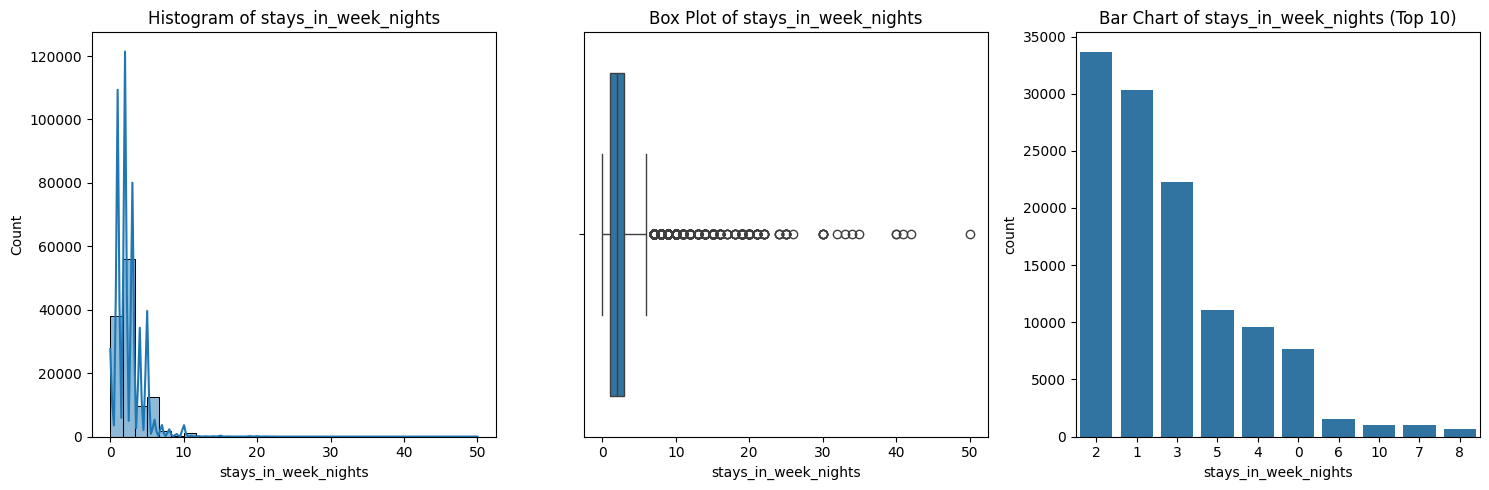

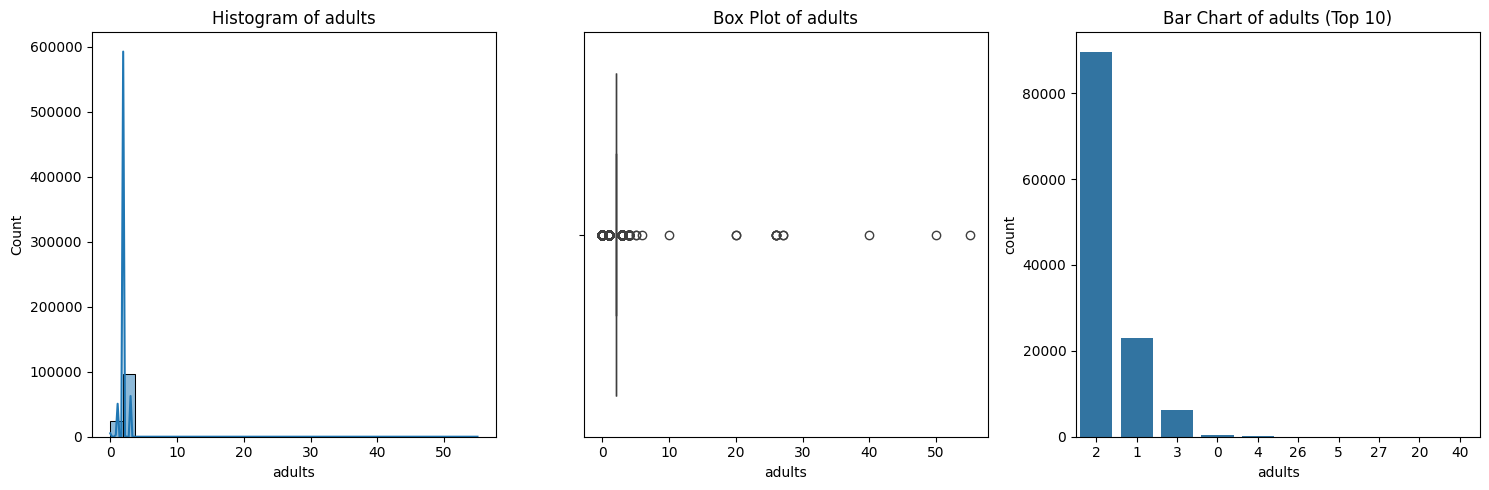

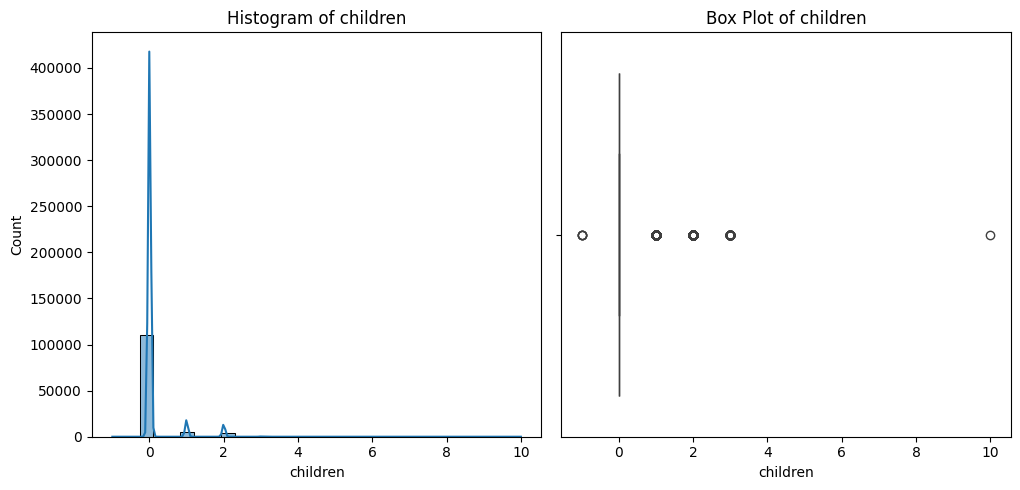

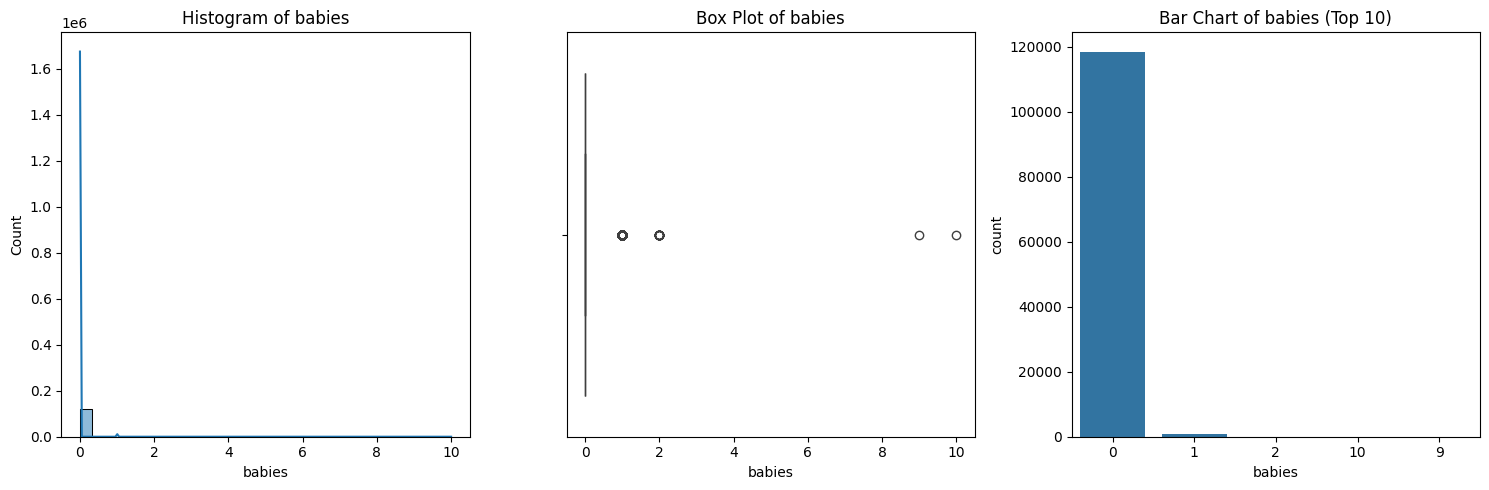

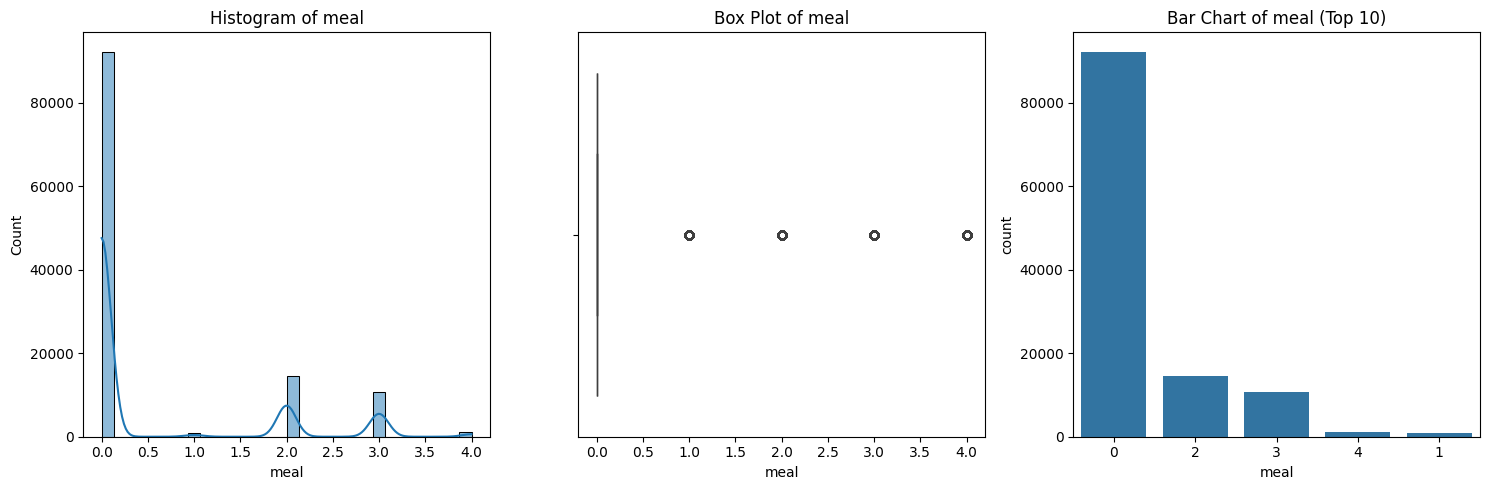

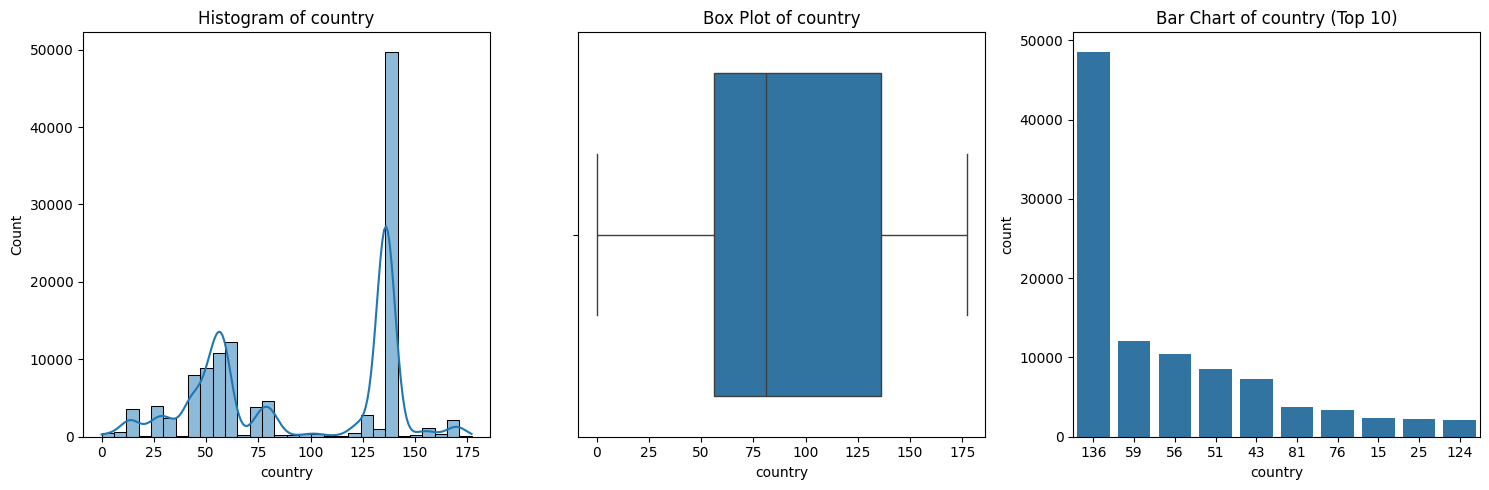

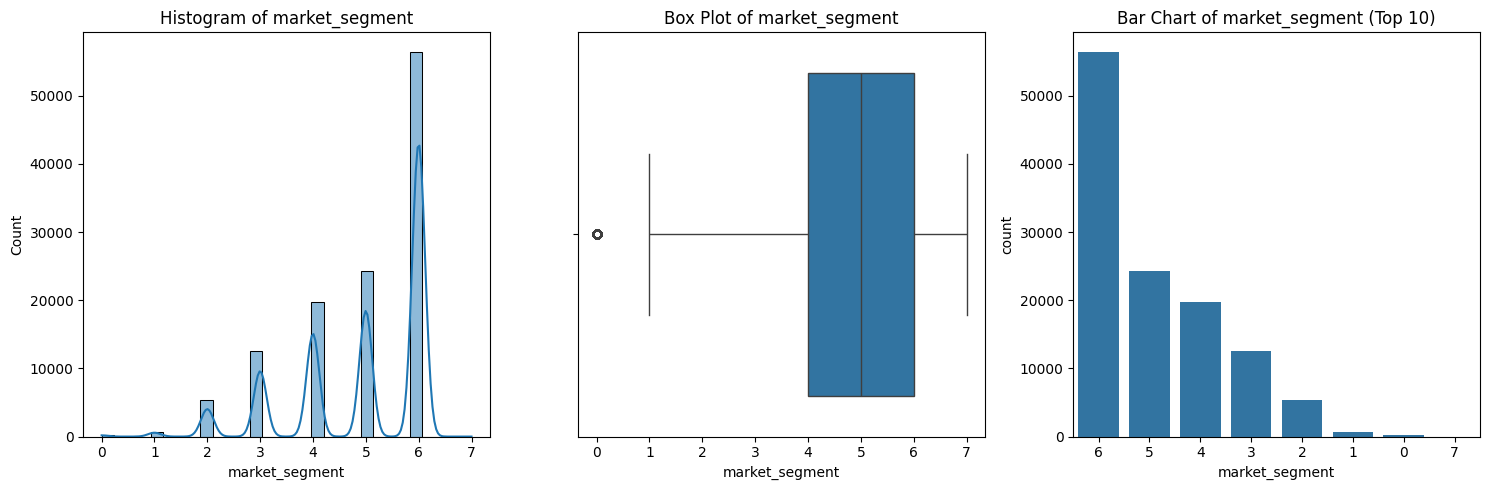

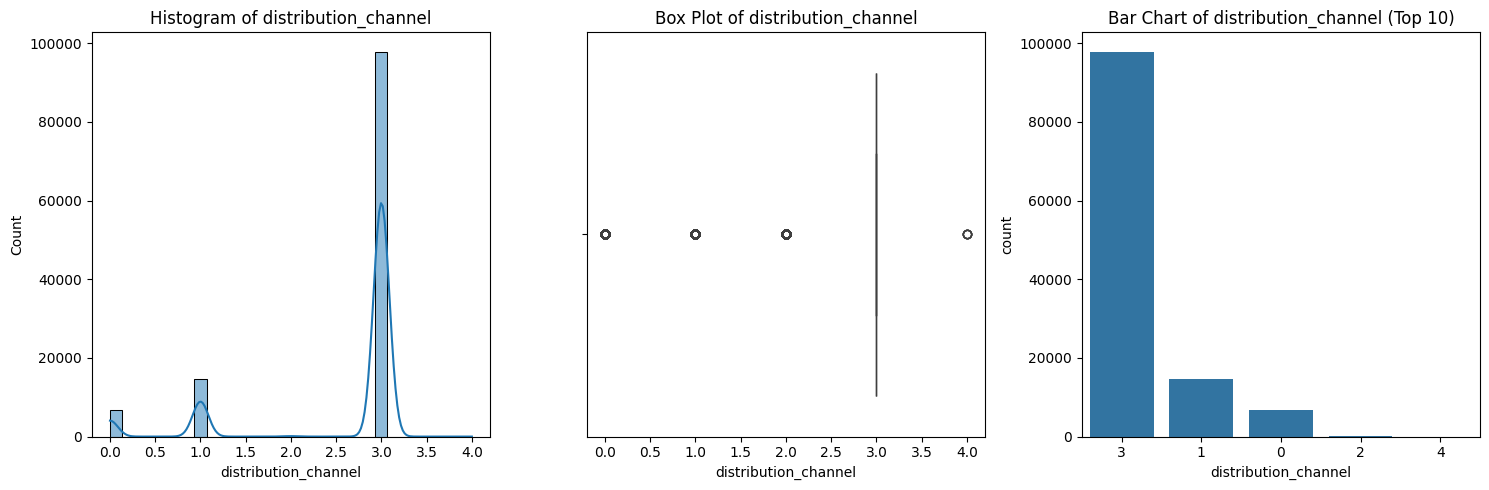

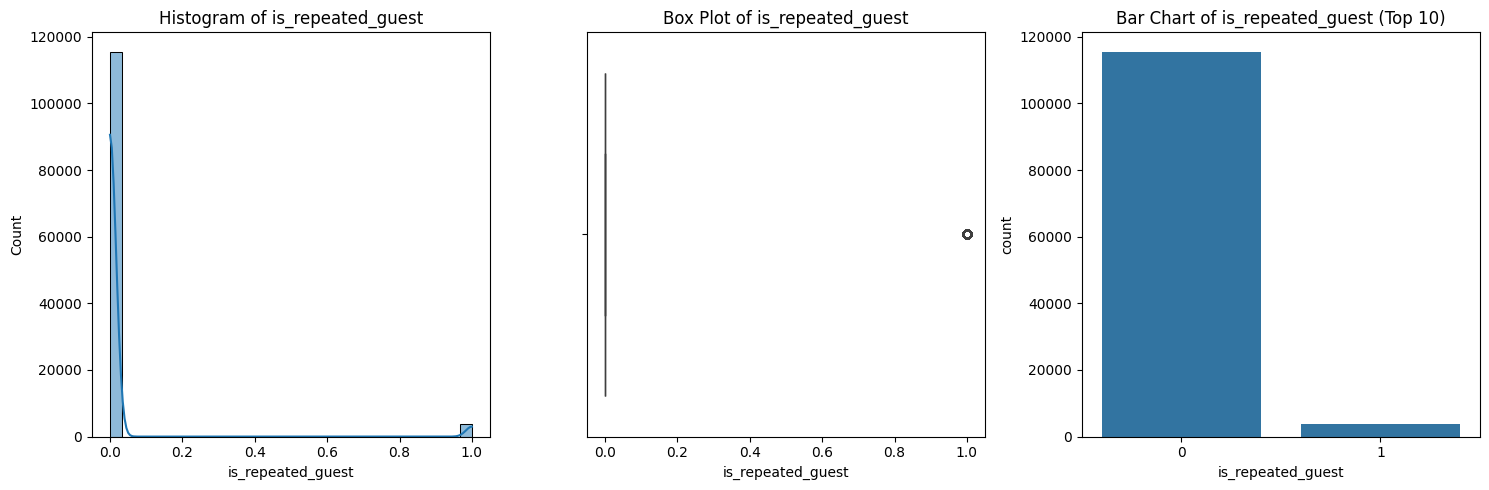

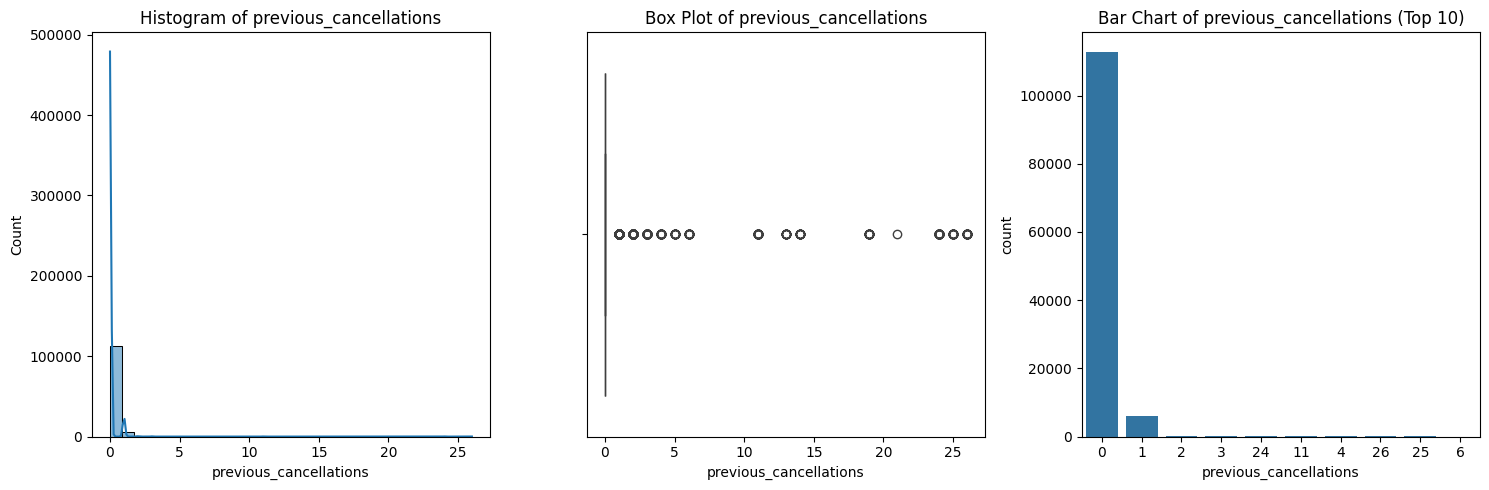

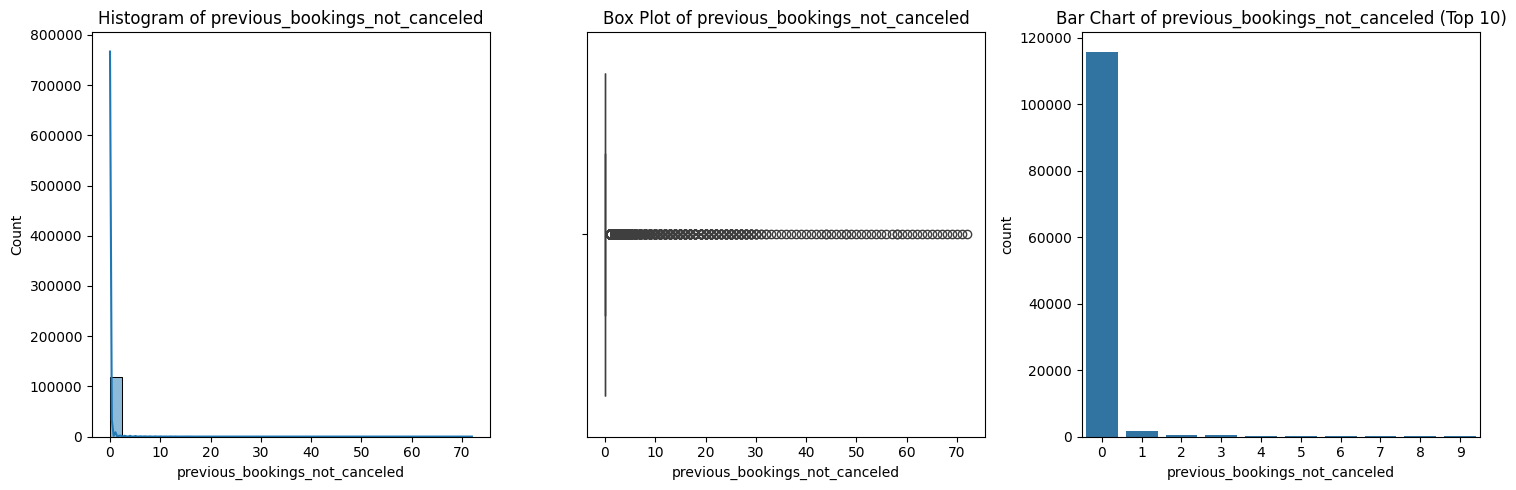

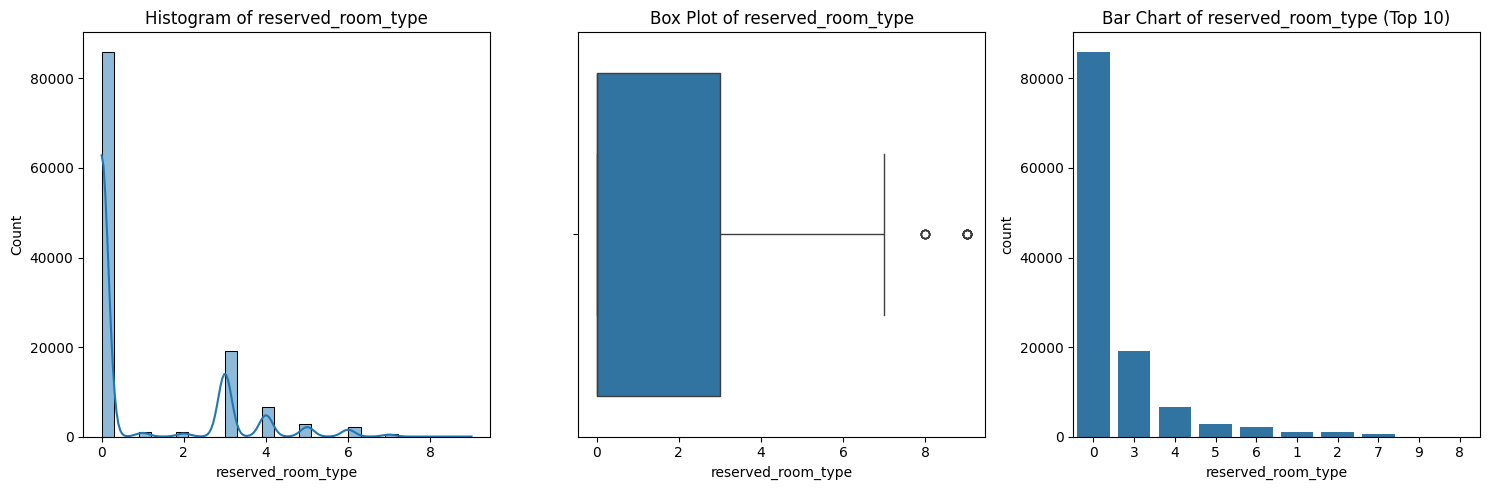

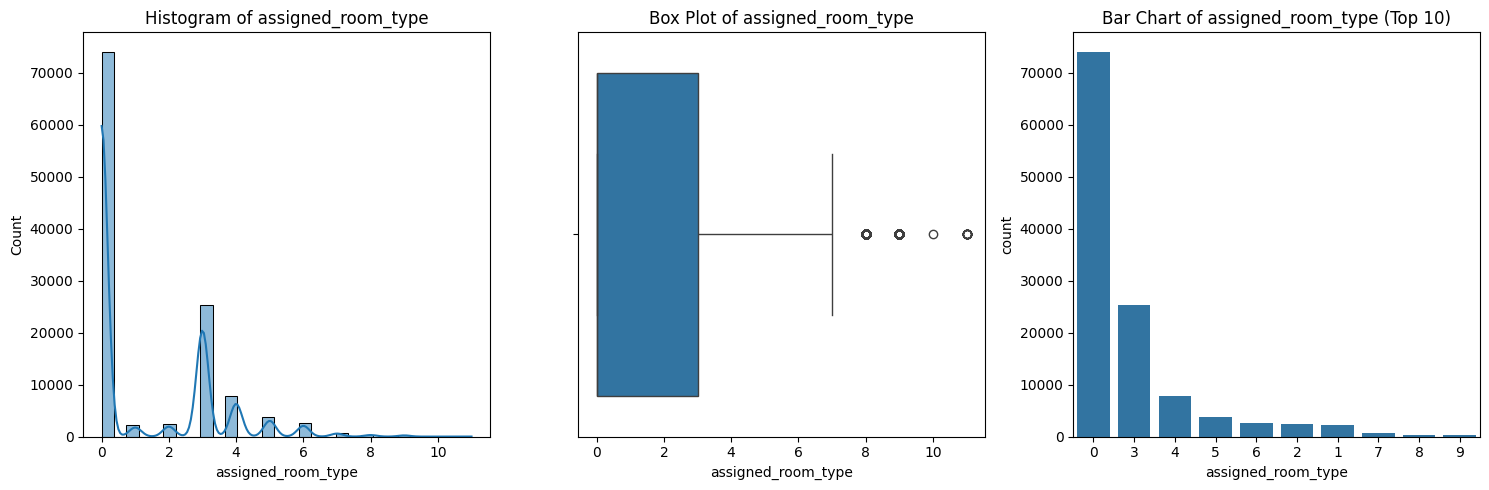

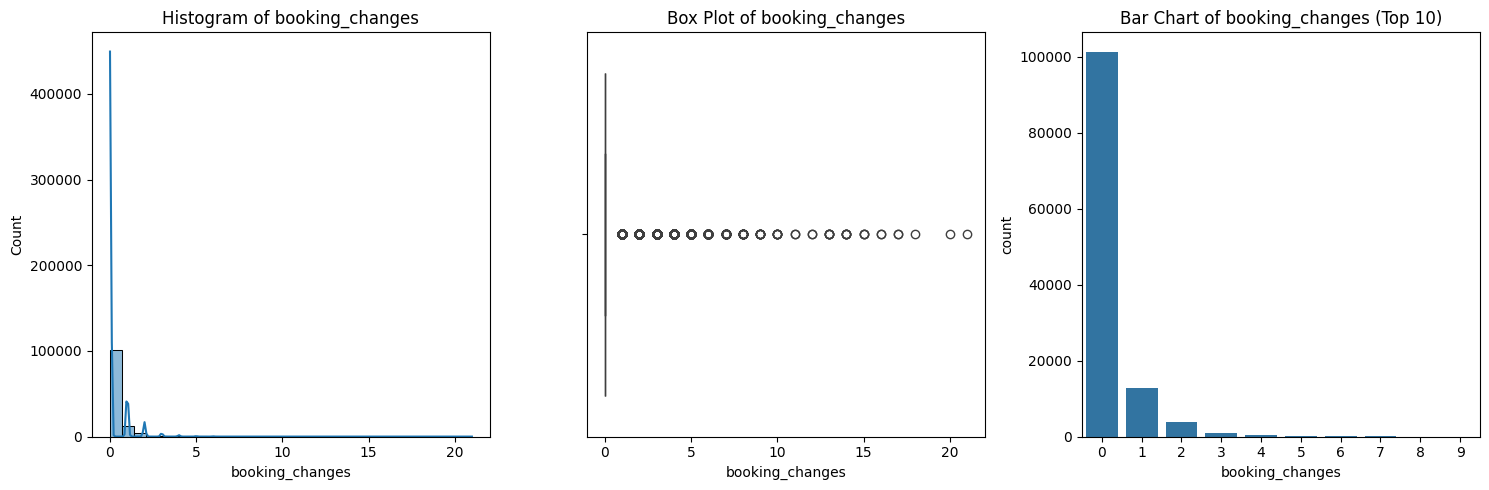

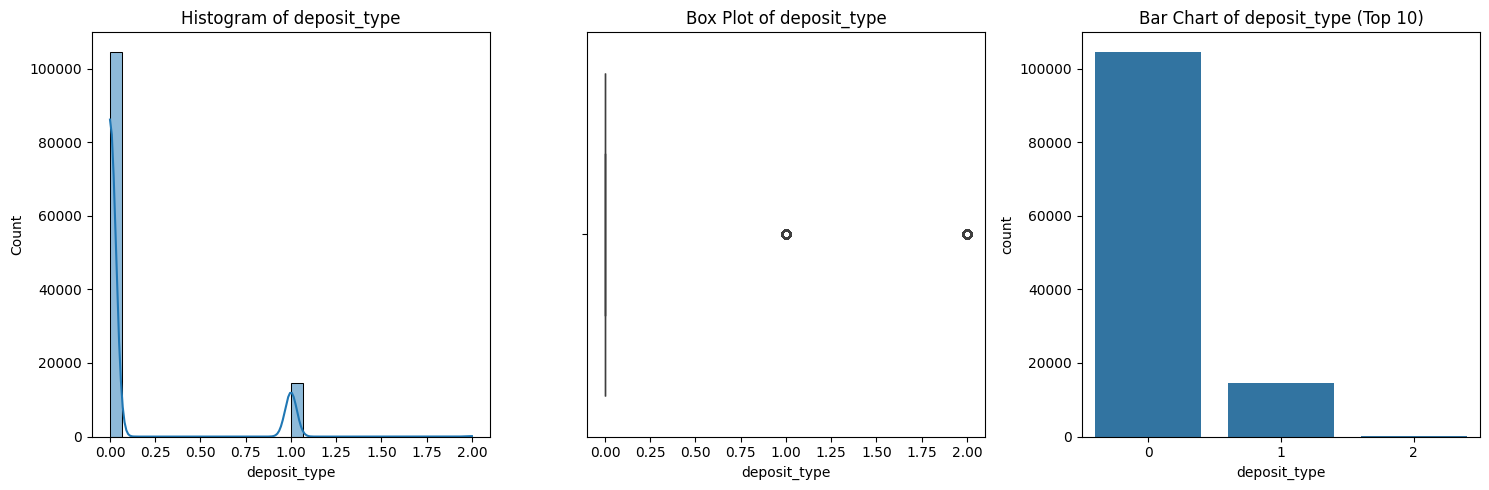

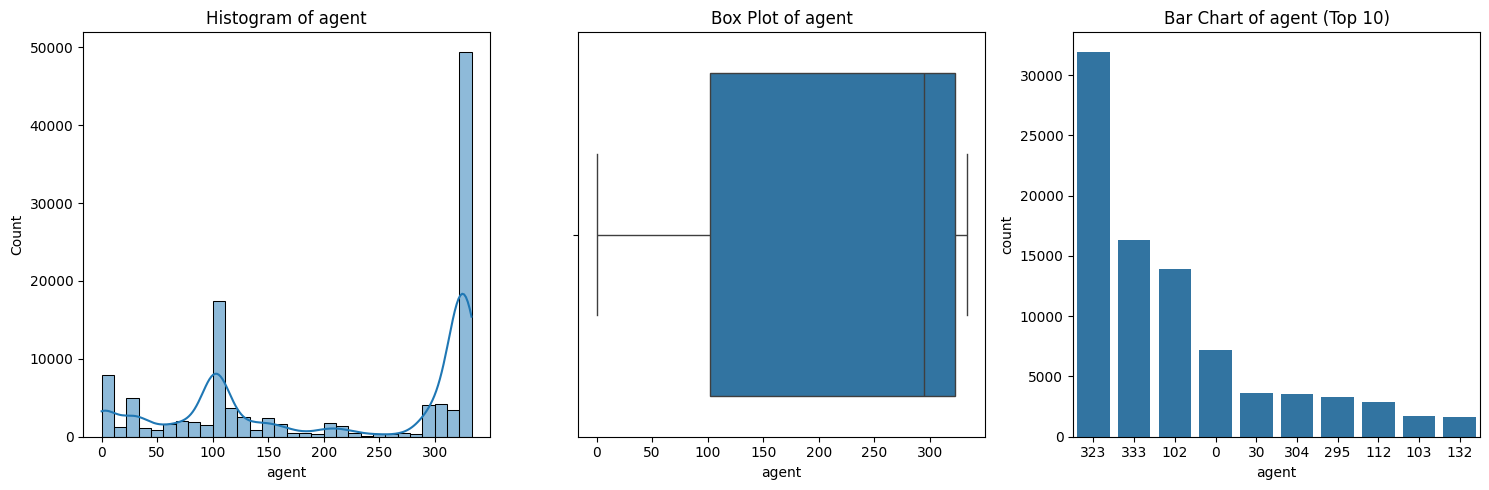

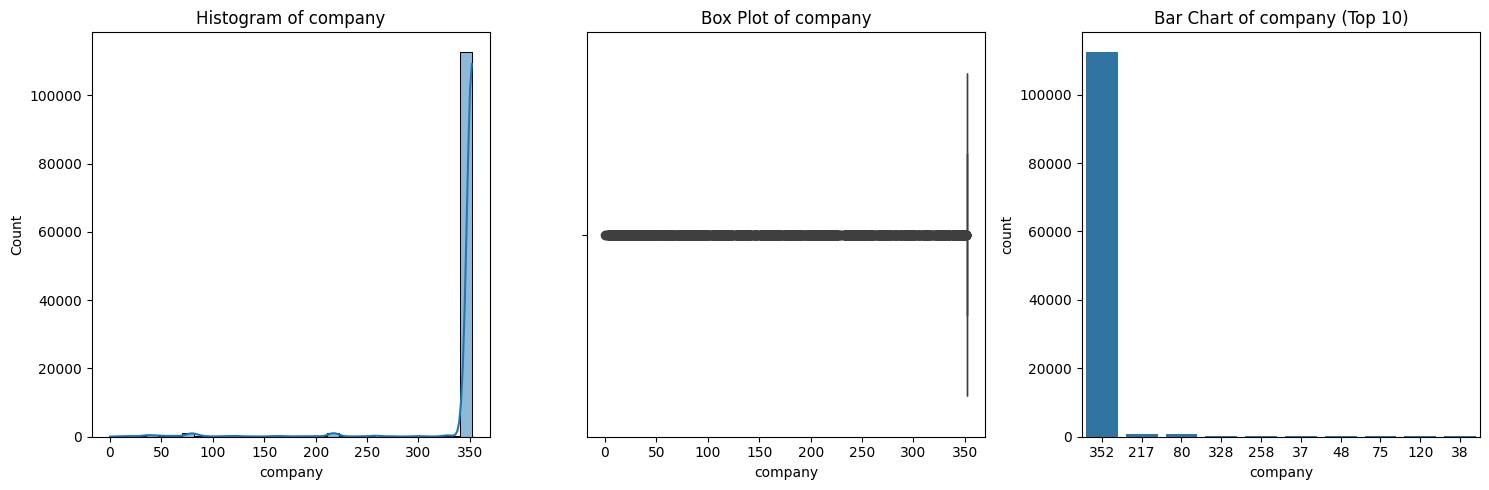

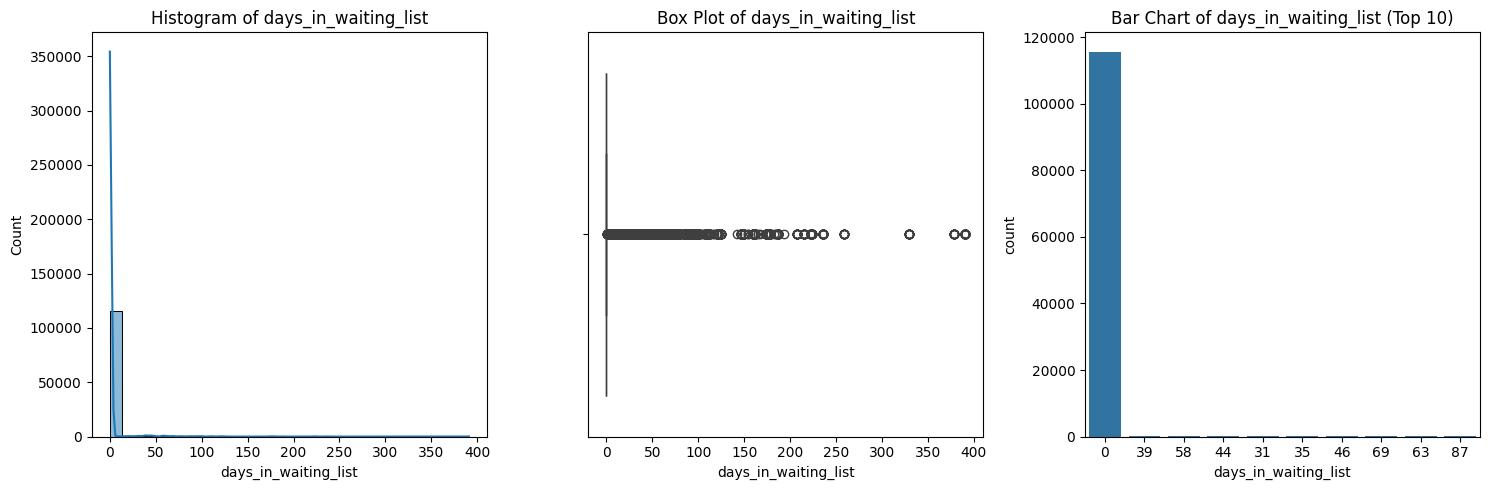

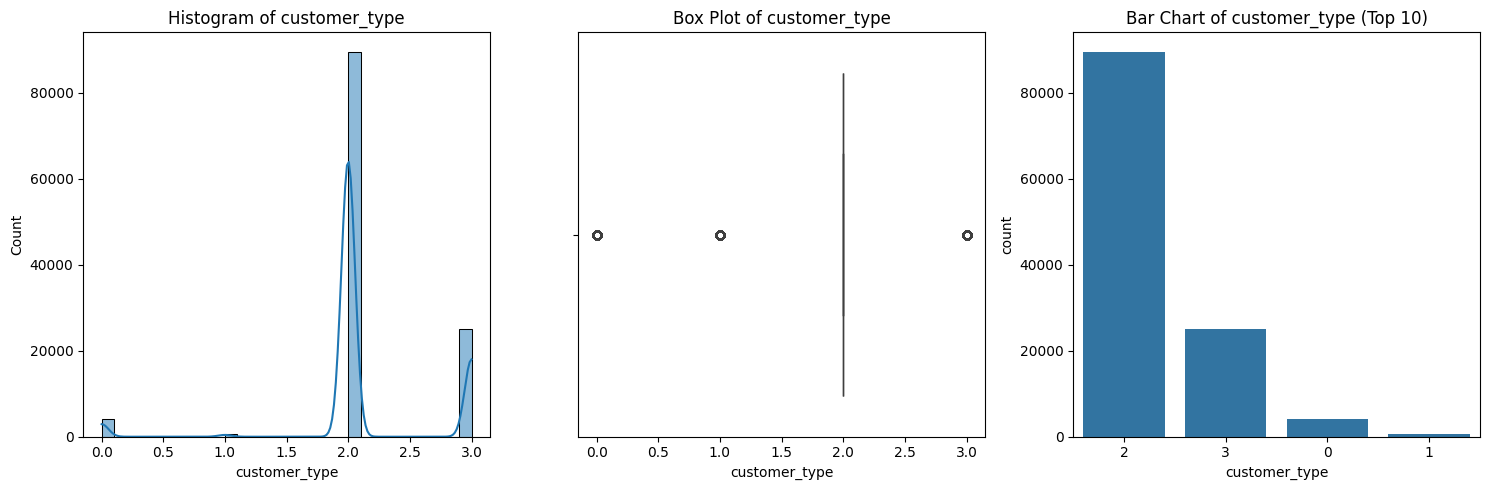

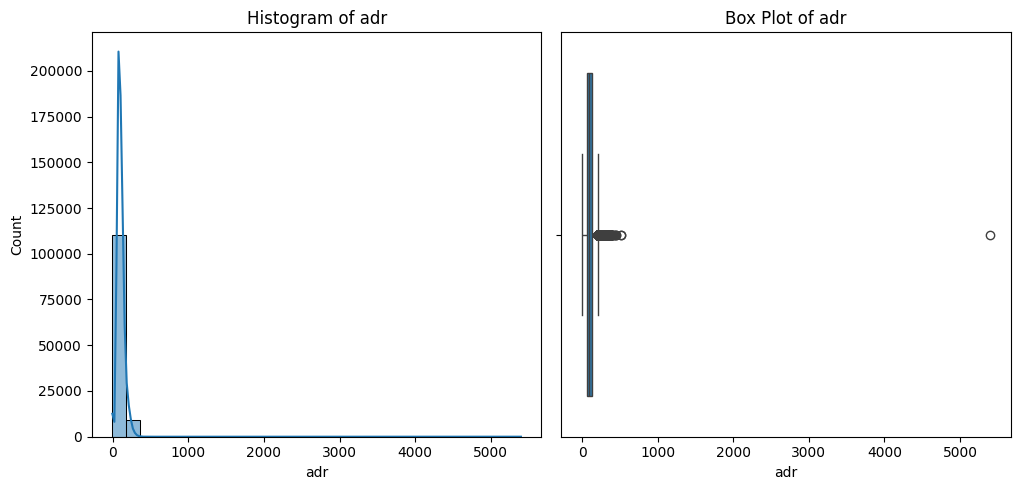

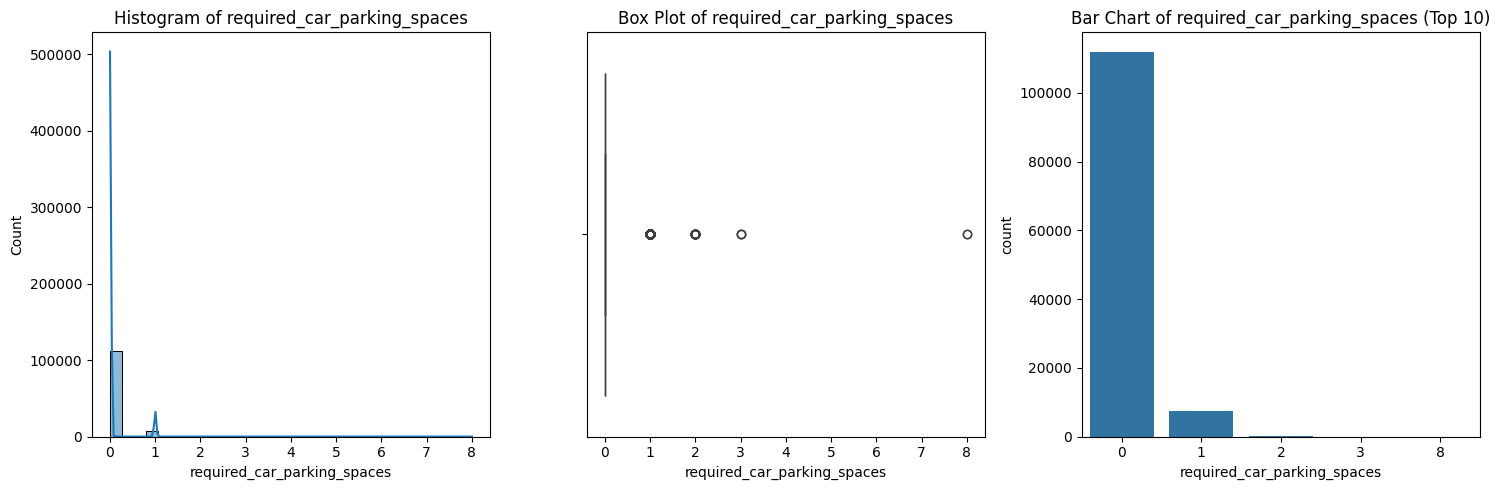

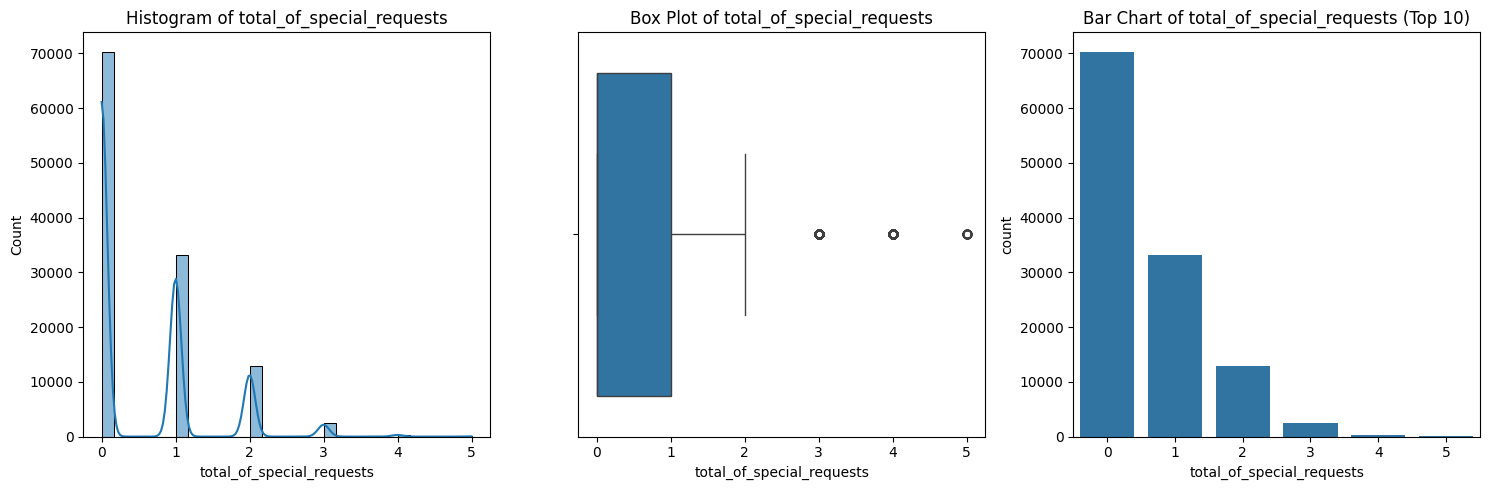

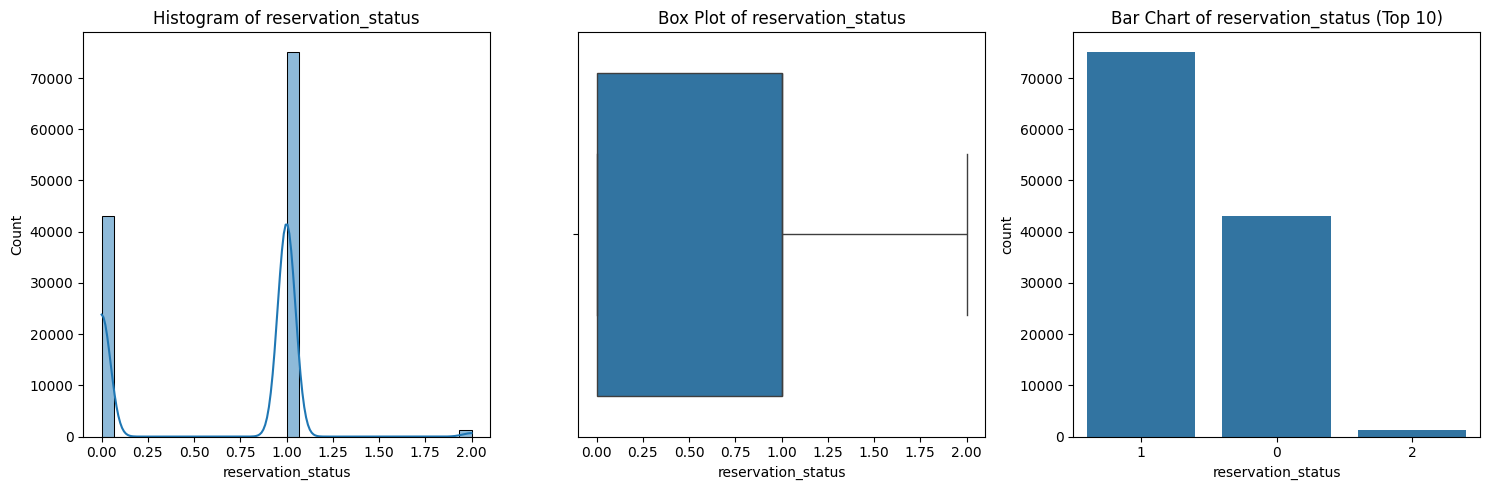

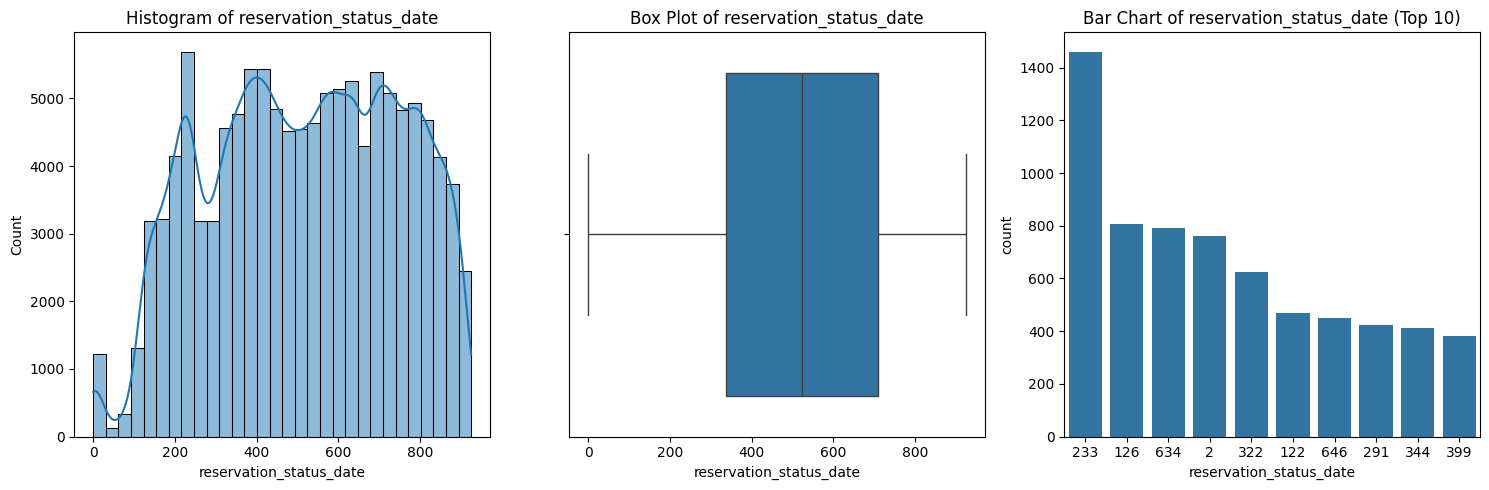

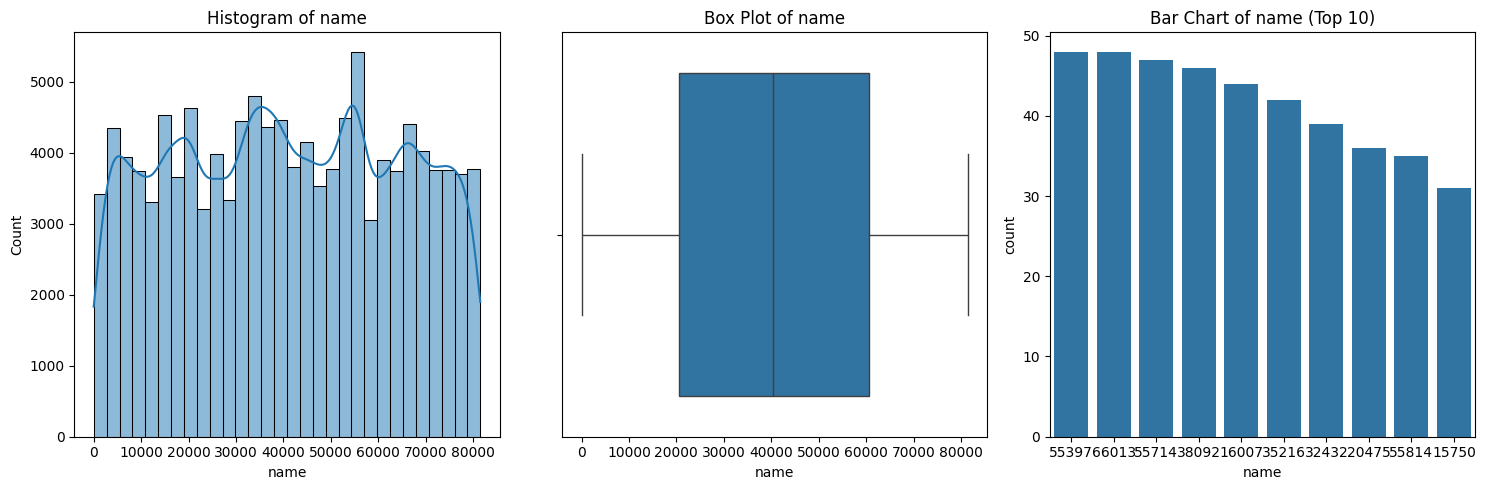

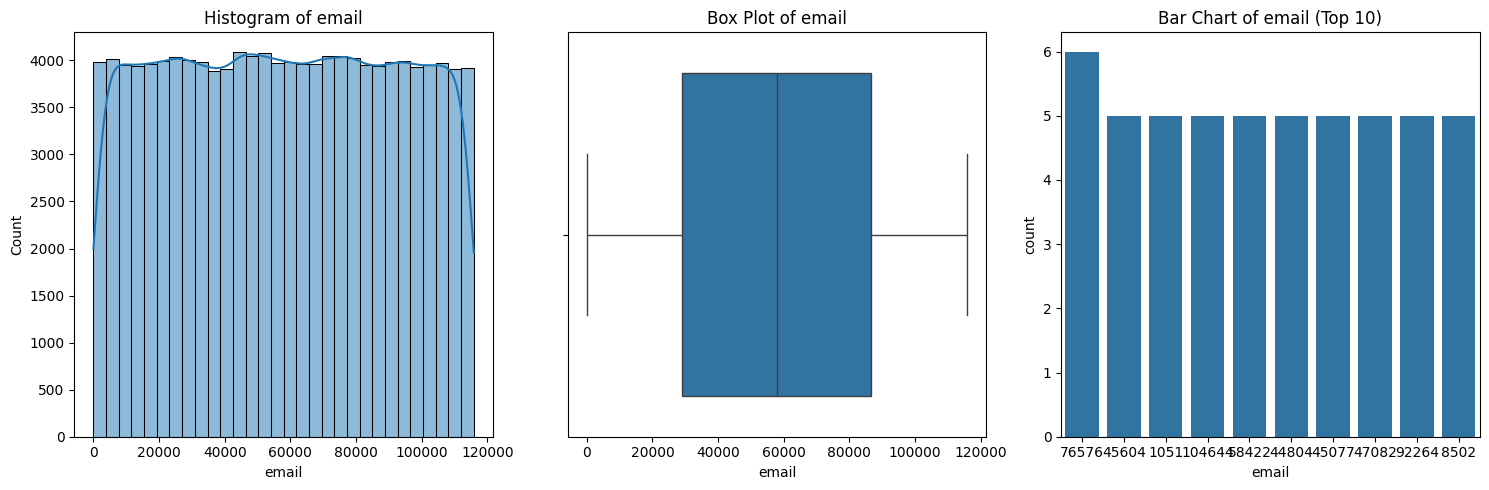

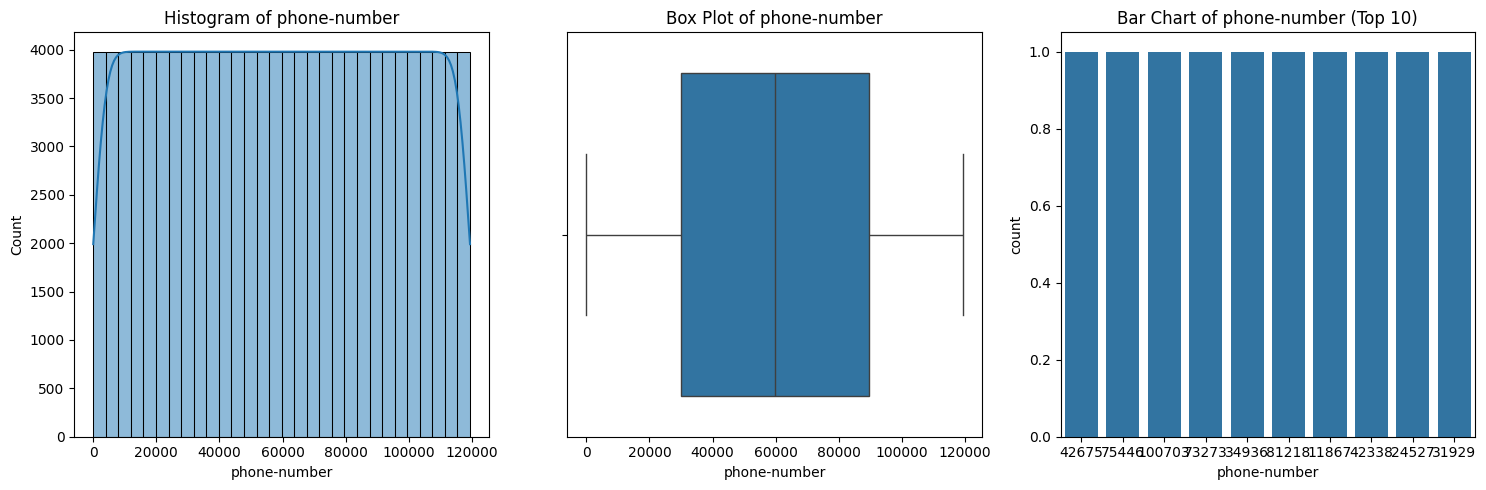

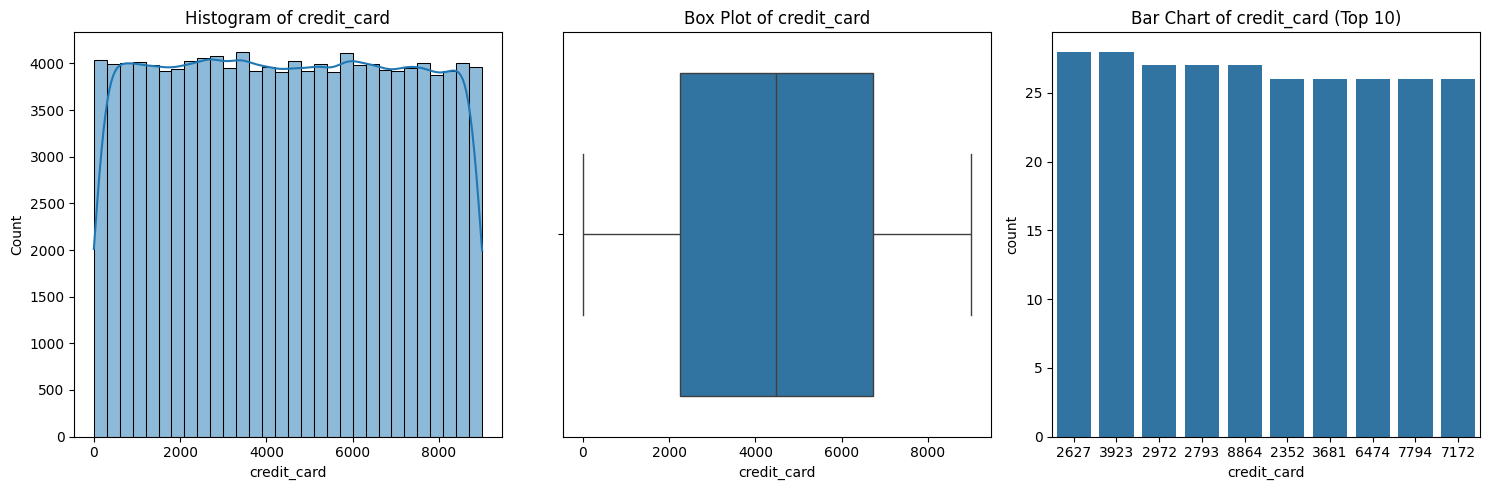

In [94]:
def univariate_analysis(data, column_name):
    describe= data[column_name].describe()
    variance_value = data[column_name].var()
    iqr_value = data[column_name].quantile(0.75) - data[column_name].quantile(0.25)
    skewness_value = data[column_name].skew()
    kurtosis_value = data[column_name].kurtosis()

    frequency_distribution = data[column_name].value_counts().head(10)

     # Visualization
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[column_name], kde=True, bins=30)
    plt.title(f'Histogram of {column_name}')

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[column_name])
    plt.title(f'Box Plot of {column_name}')

   
    # Bar Chart (for categorical features)
    if data[column_name].dtype == 'int' or data[column_name].dtype == 'object':
        plt.subplot(1, 3, 3)
        sns.countplot(x=data[column_name], order=data[column_name].value_counts().index[:10])
        plt.title(f'Bar Chart of {column_name} (Top 10)')


    plt.tight_layout()
    plt.show()

variables_to_analyse=data.columns
for varible in variables_to_analyse:
    univariate_analysis(data, varible)


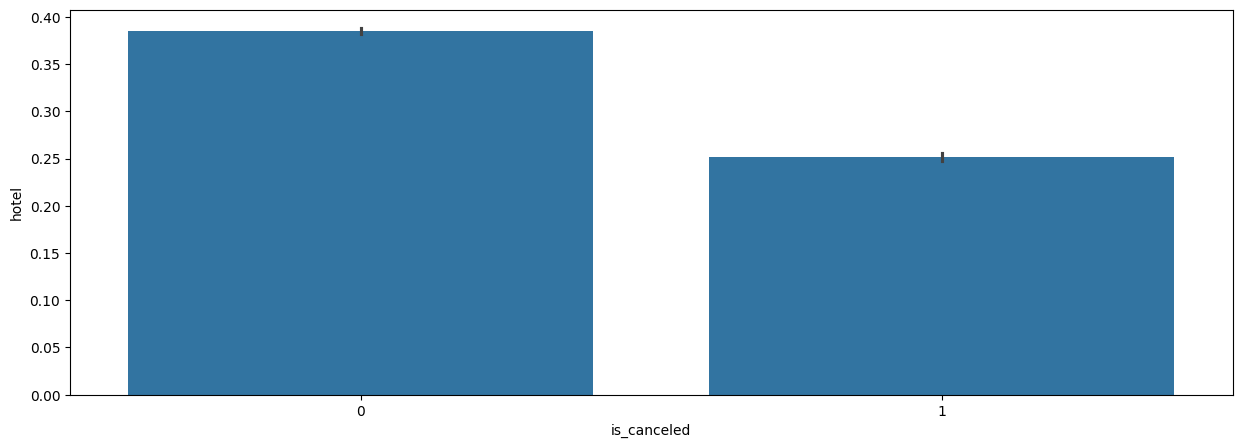

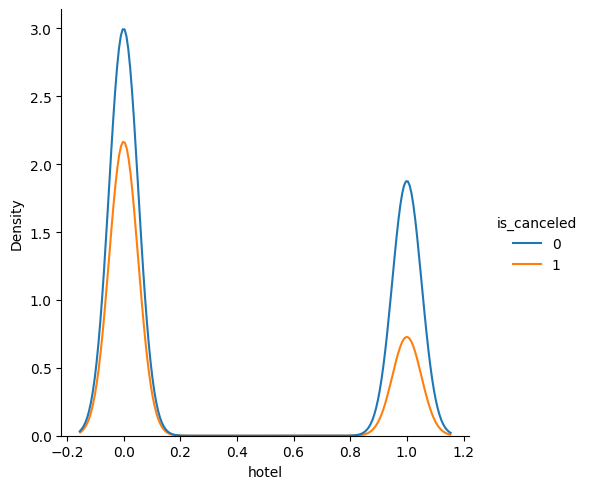

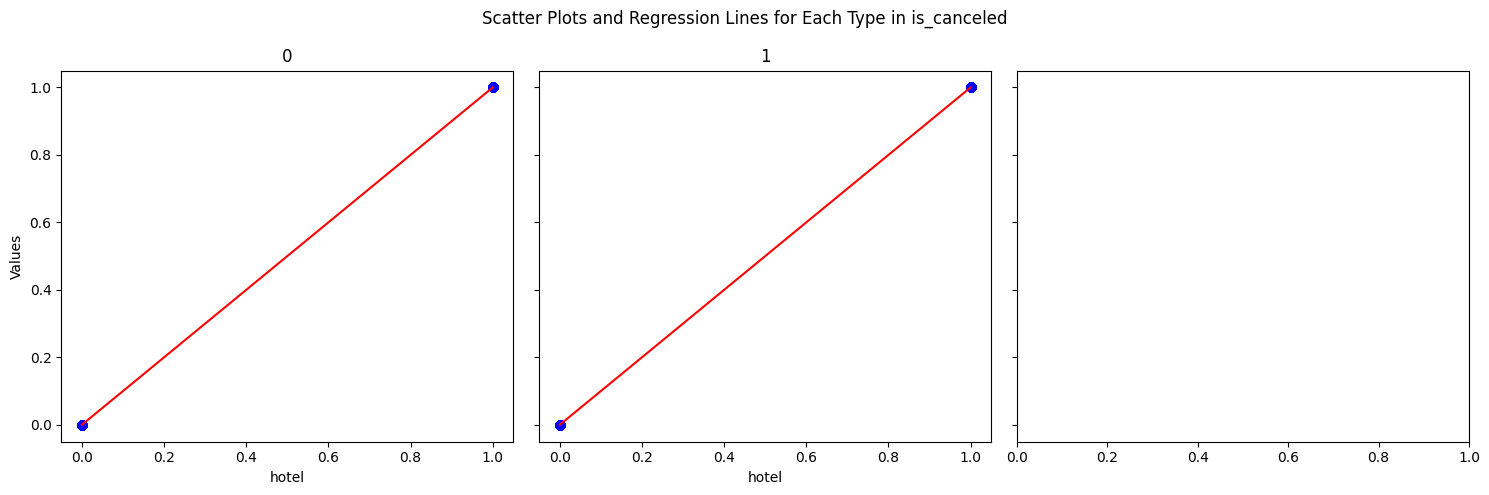

C:\Users\Vasco\AppData\Local\Temp\ipykernel_13692\508191631.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=data_univariate, x= column_name, hue=Objective_col, kind="kde")


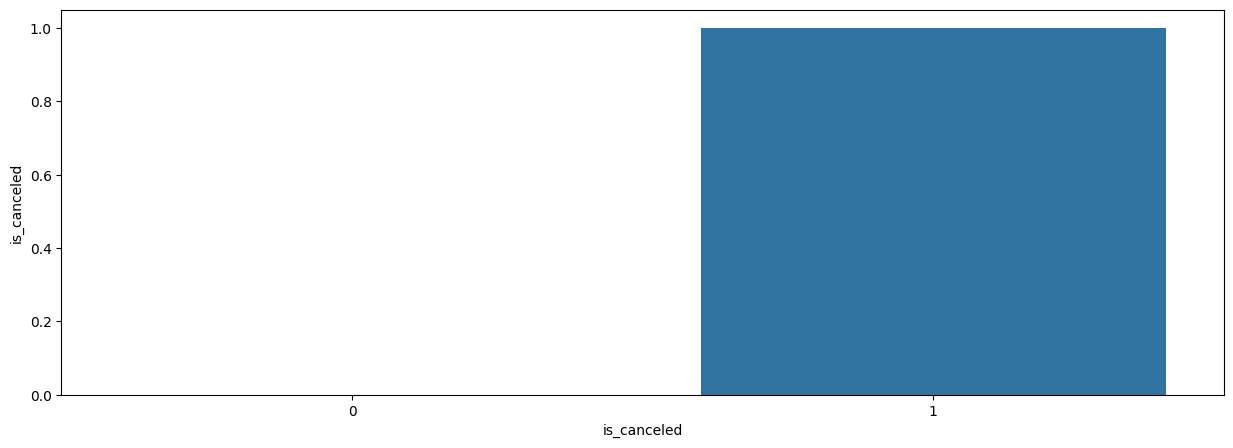

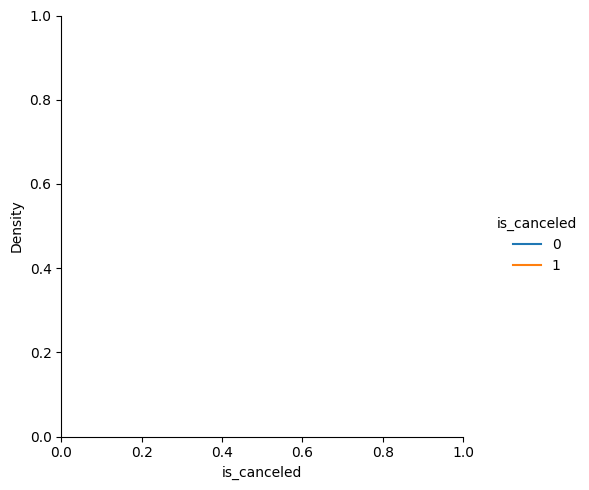

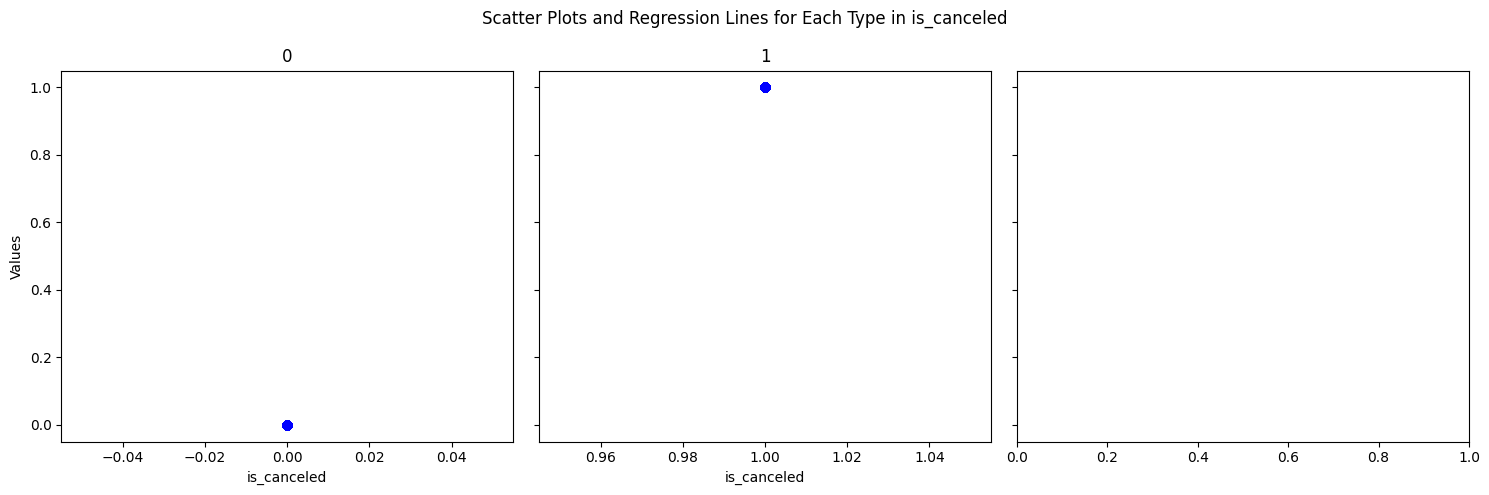

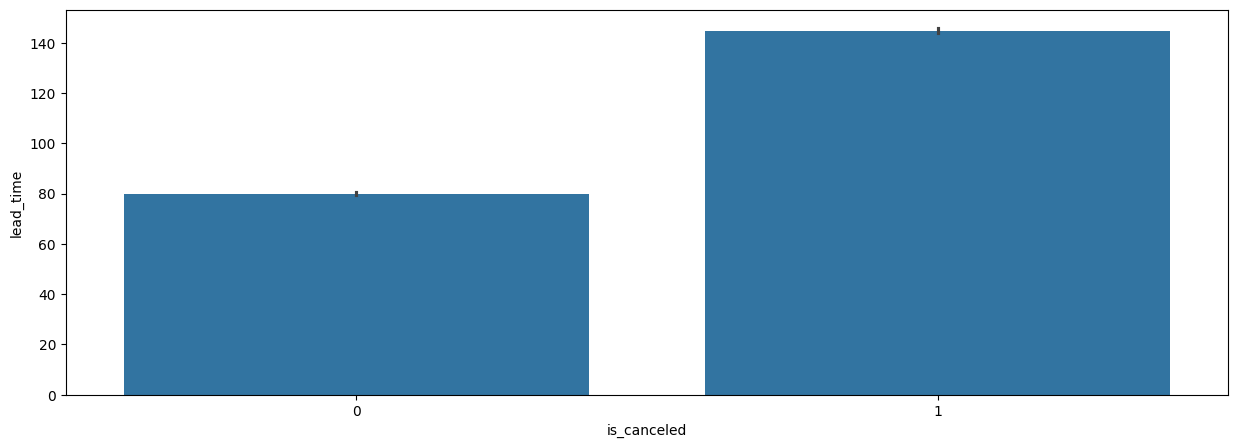

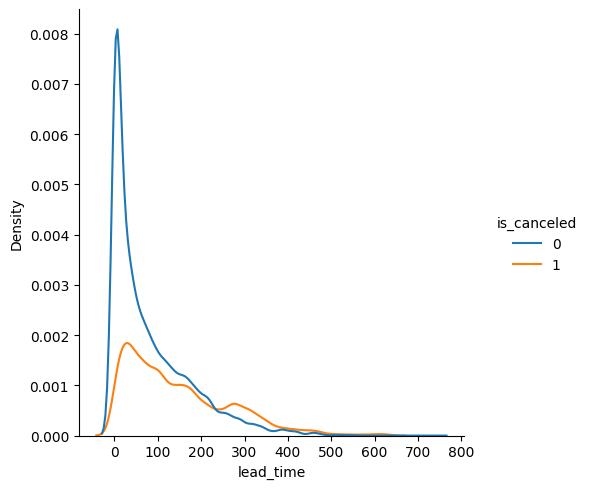

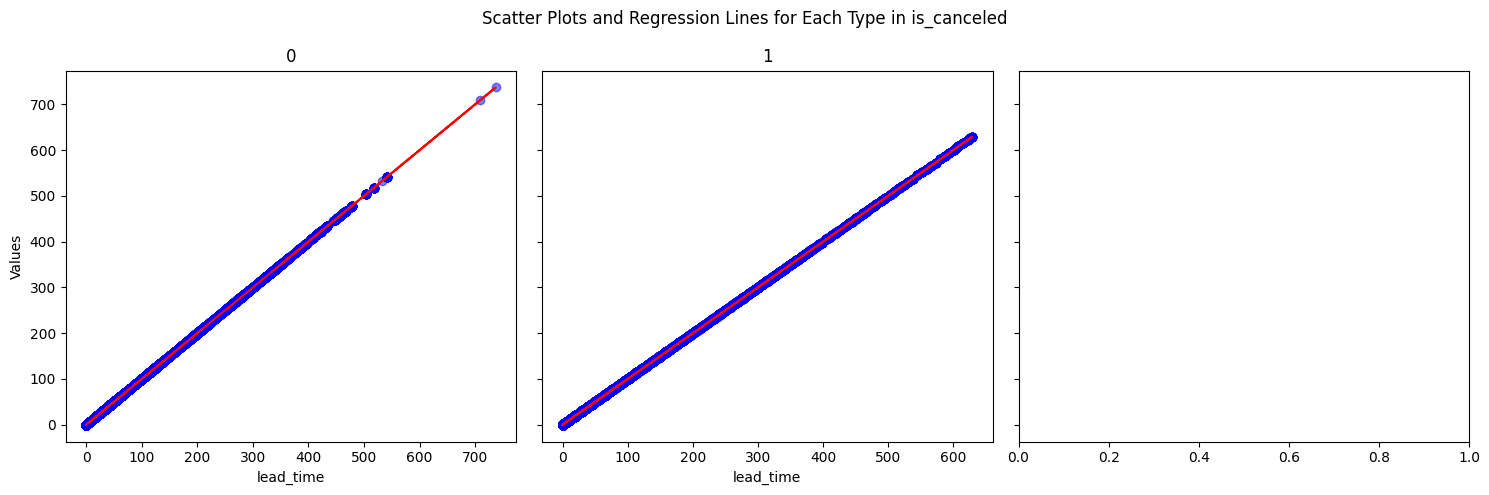

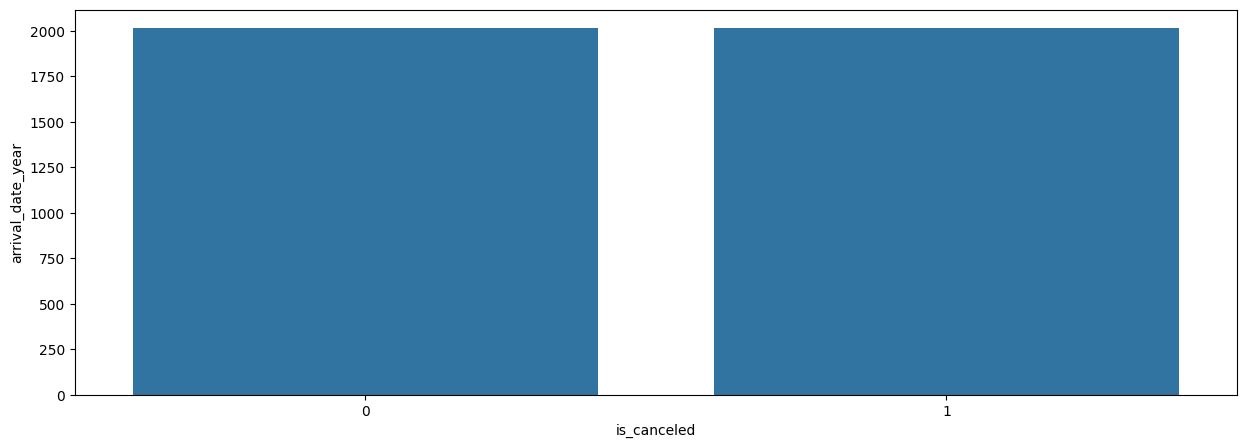

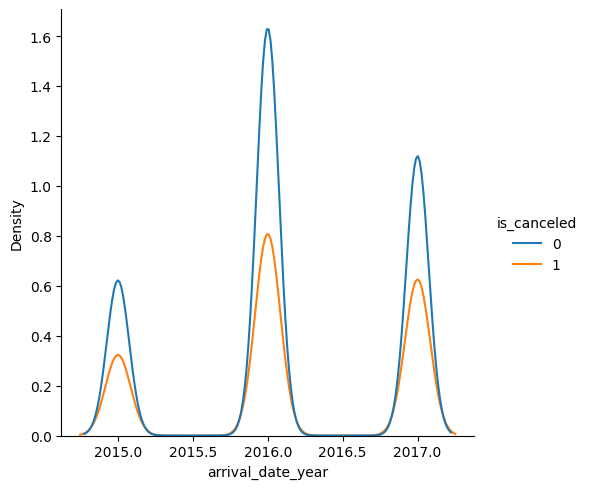

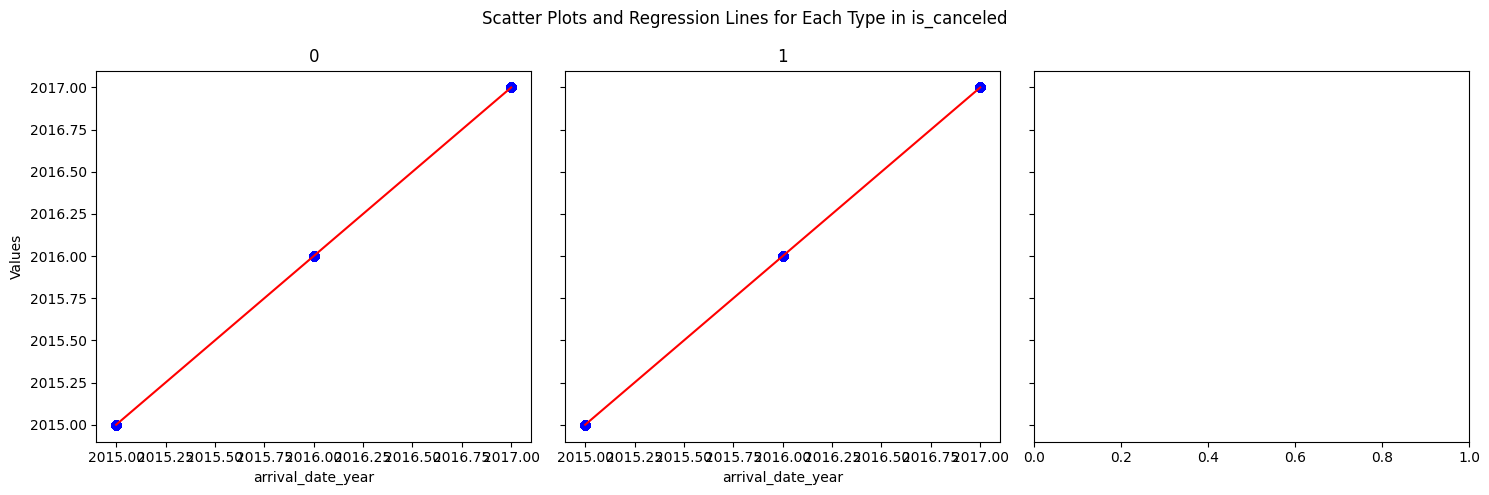

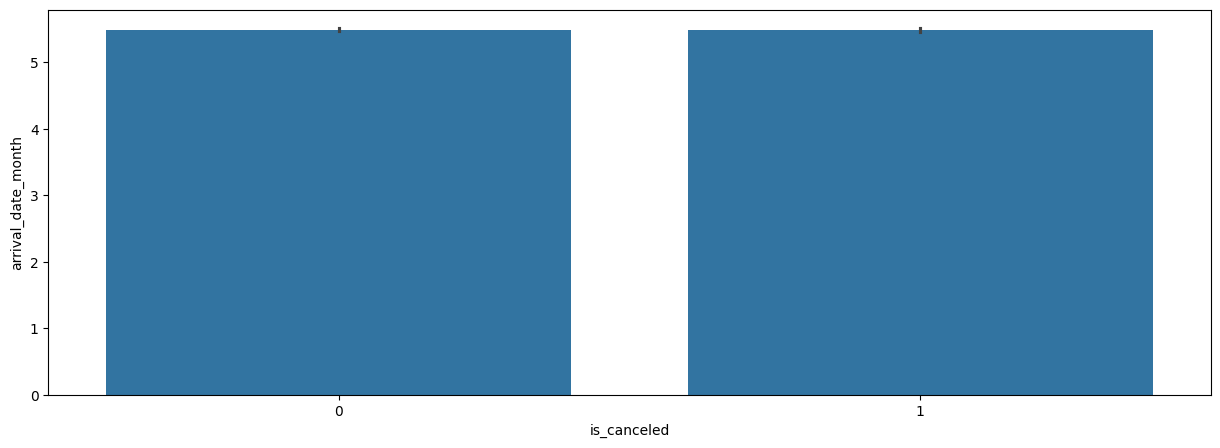

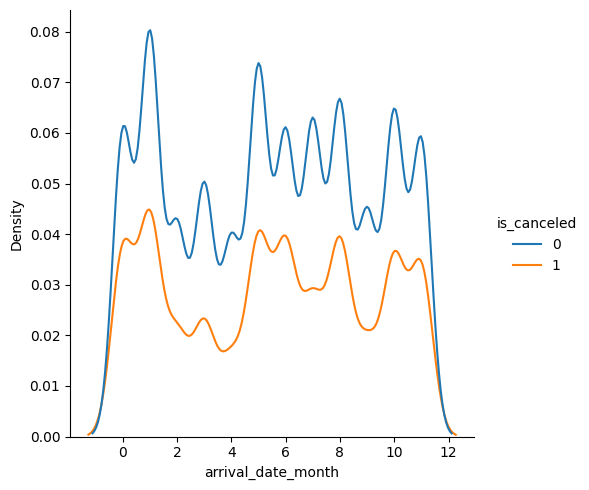

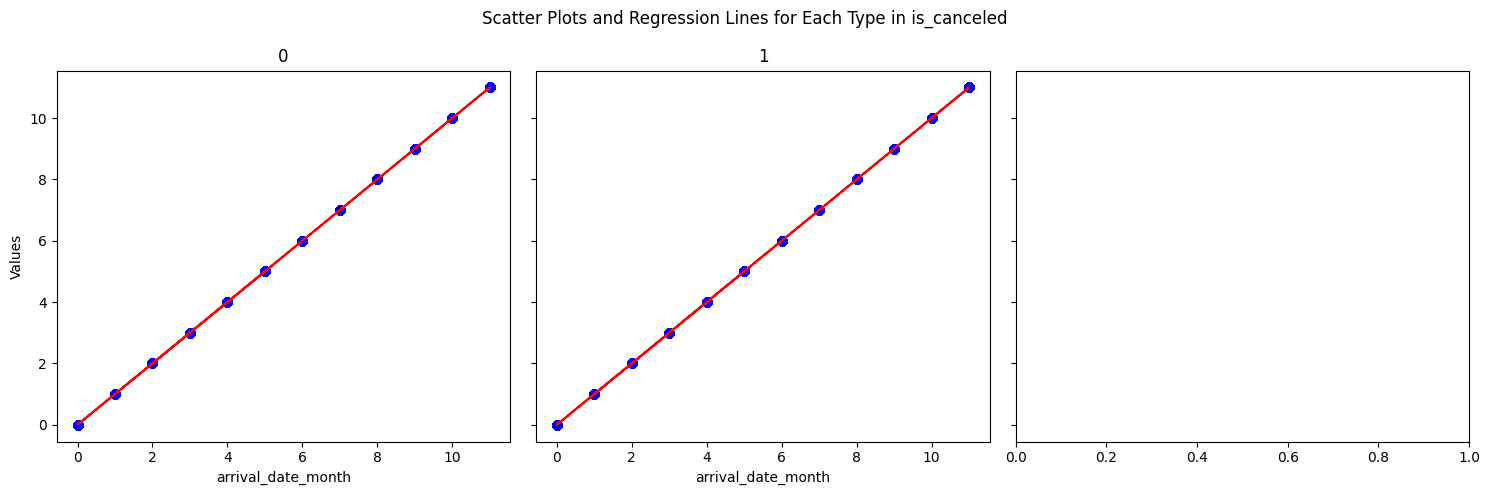

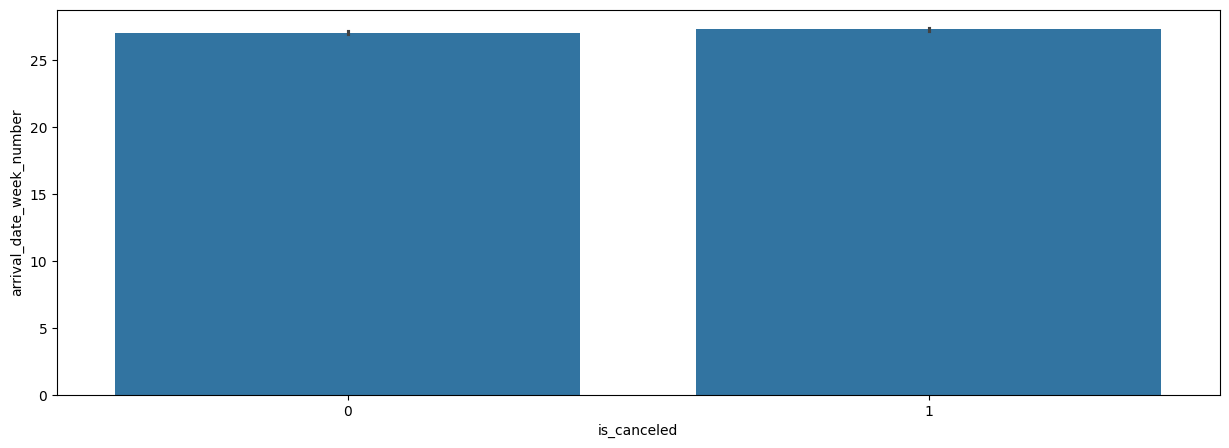

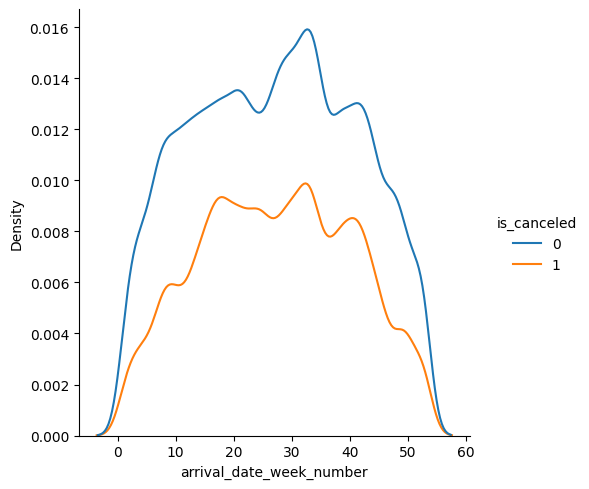

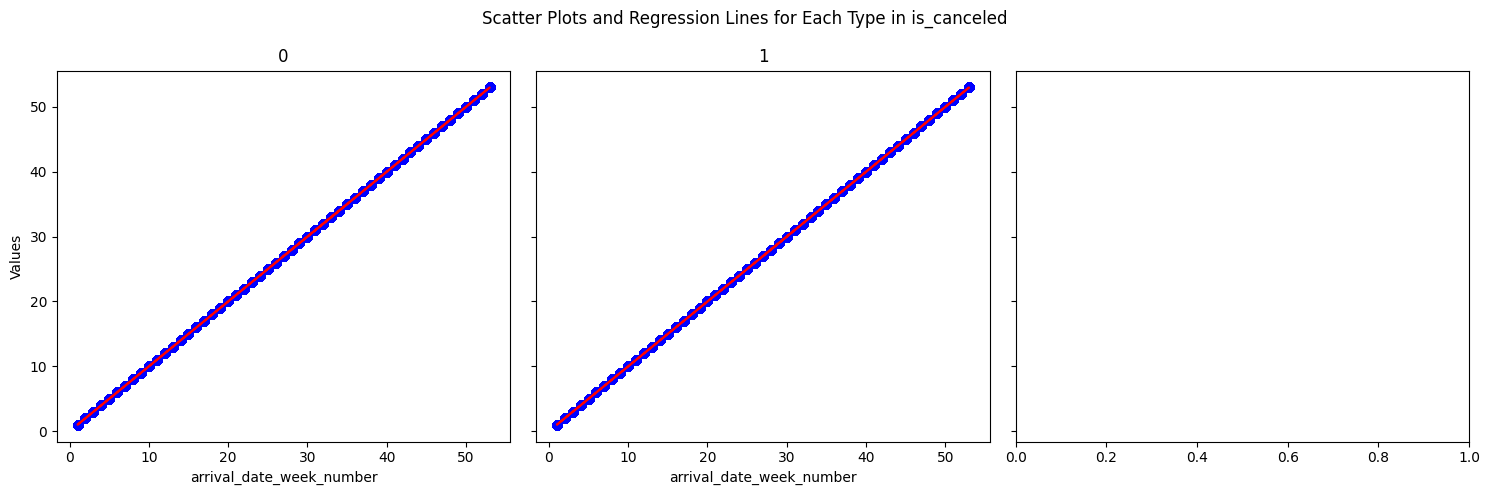

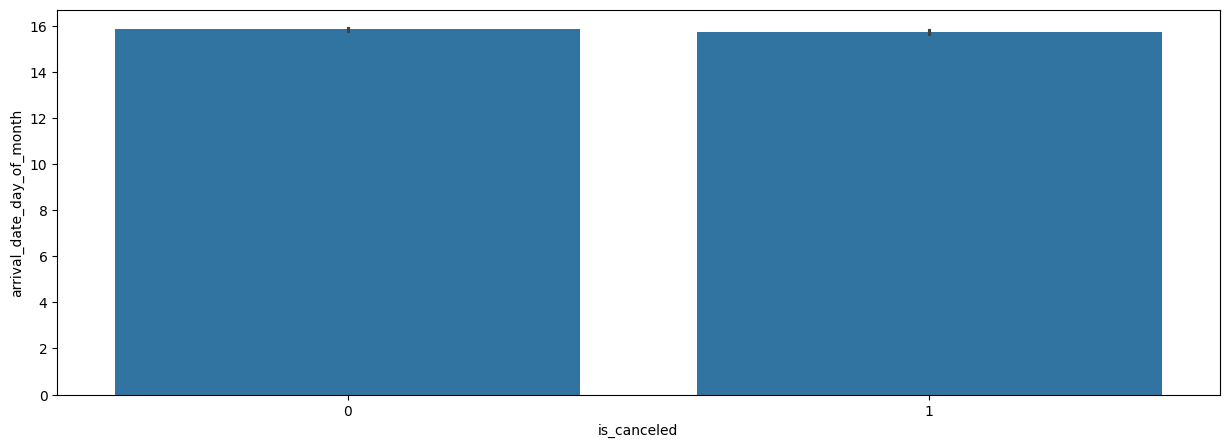

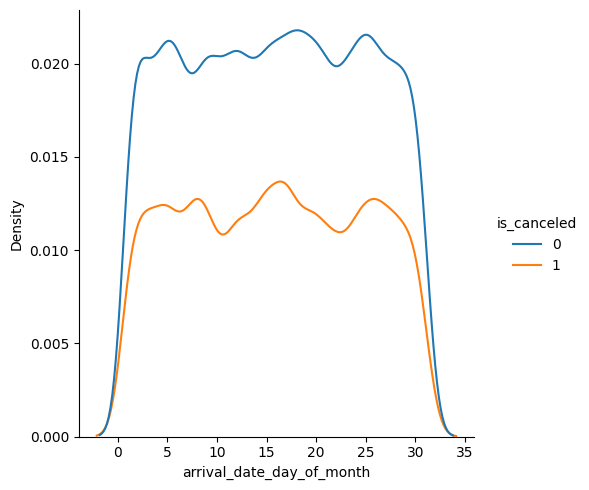

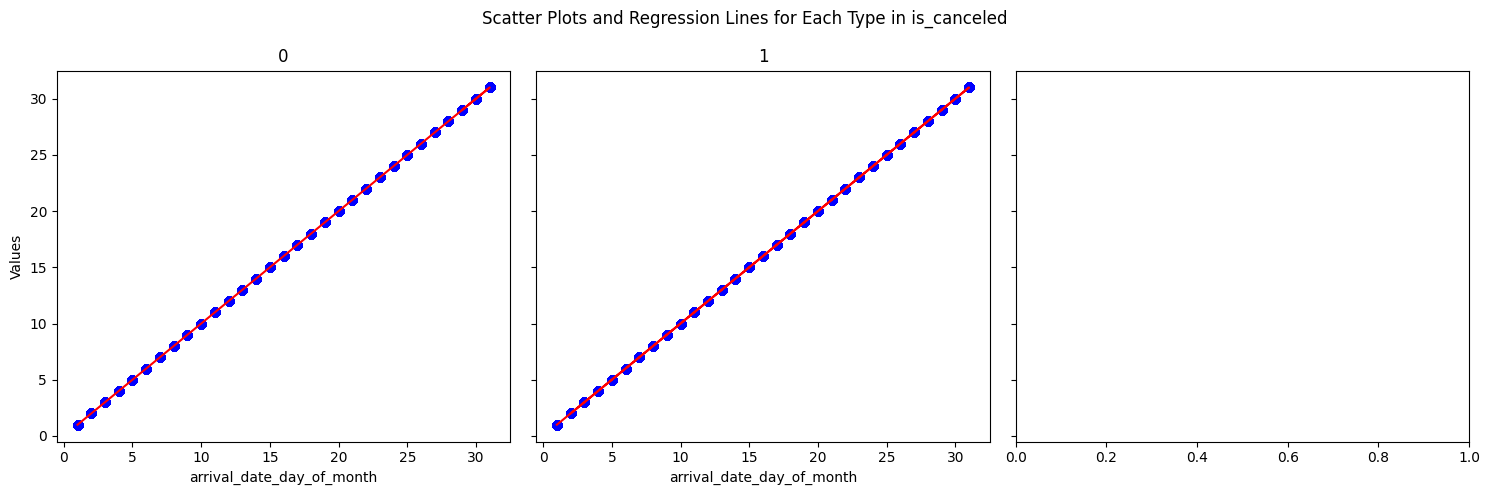

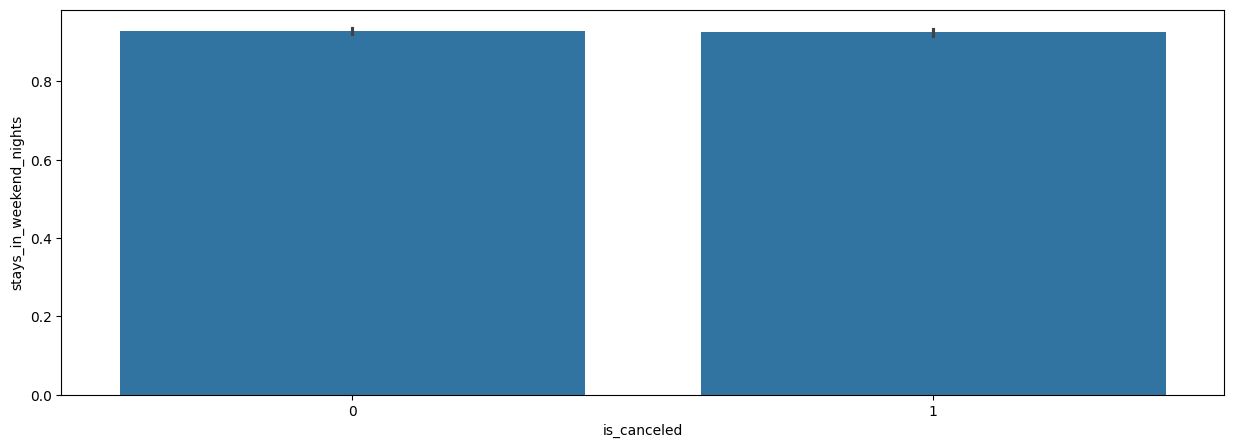

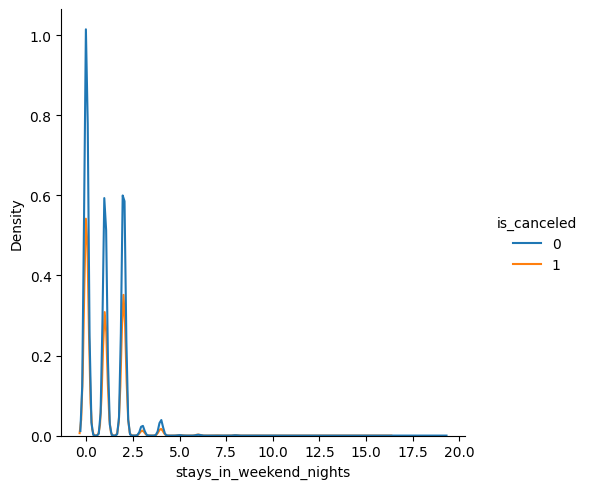

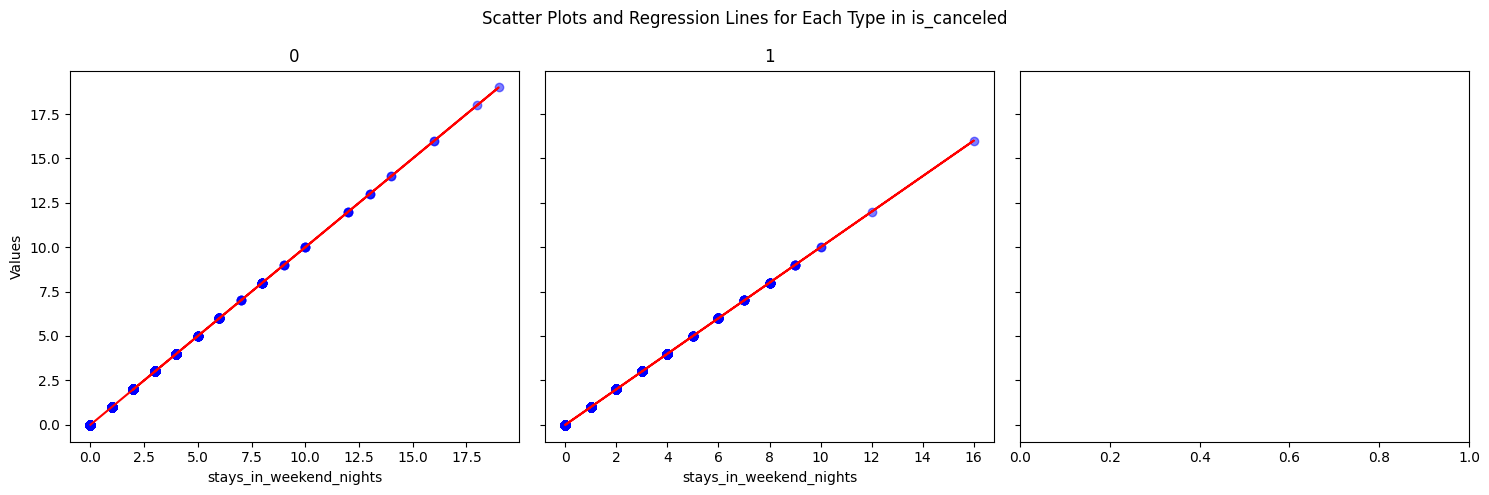

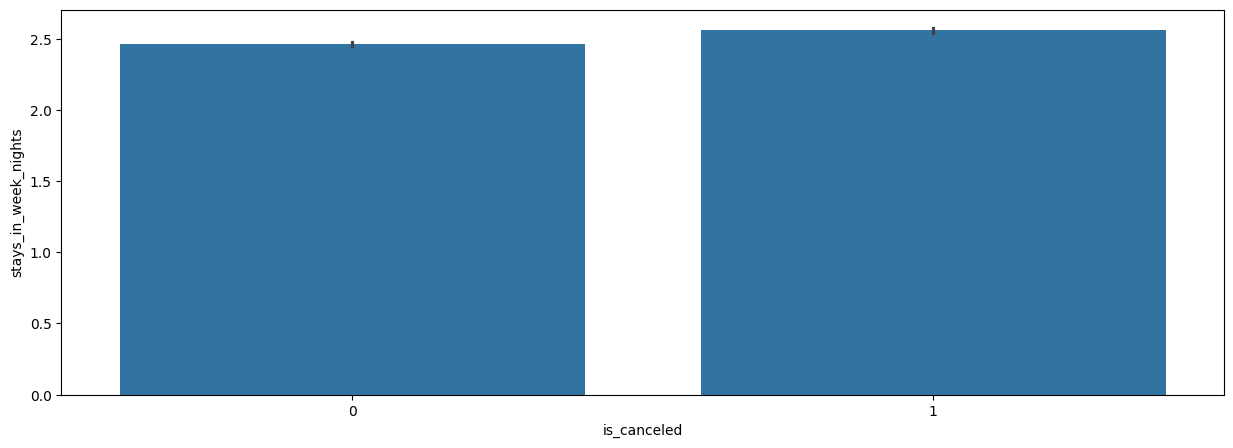

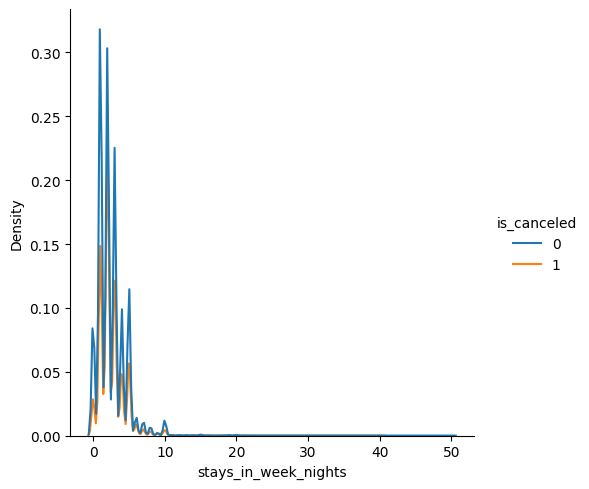

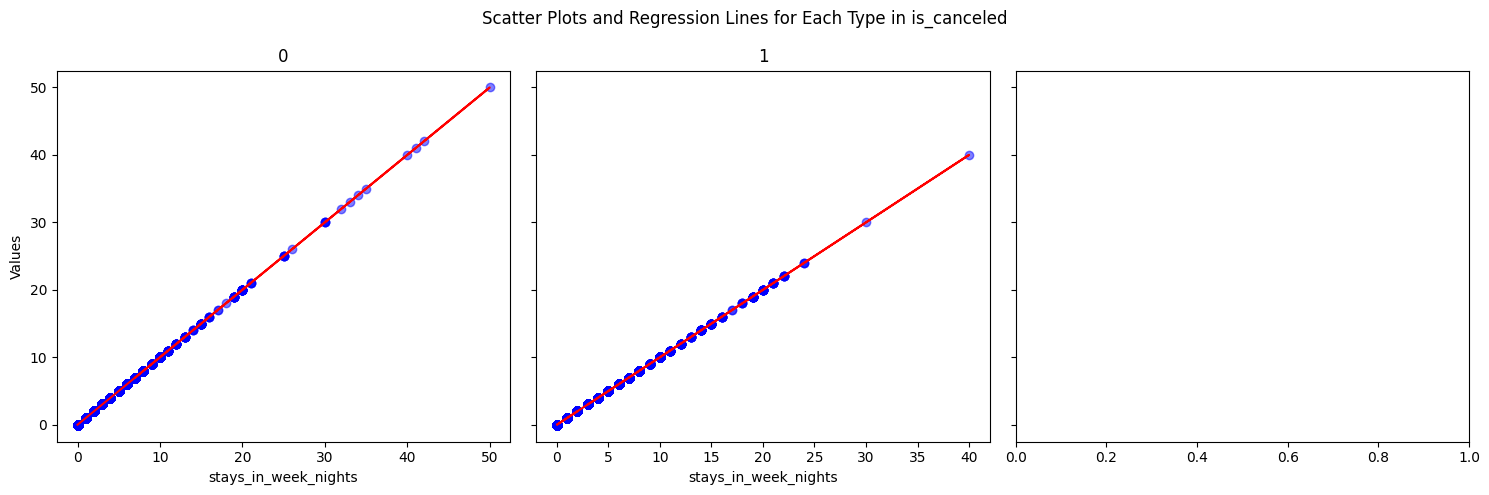

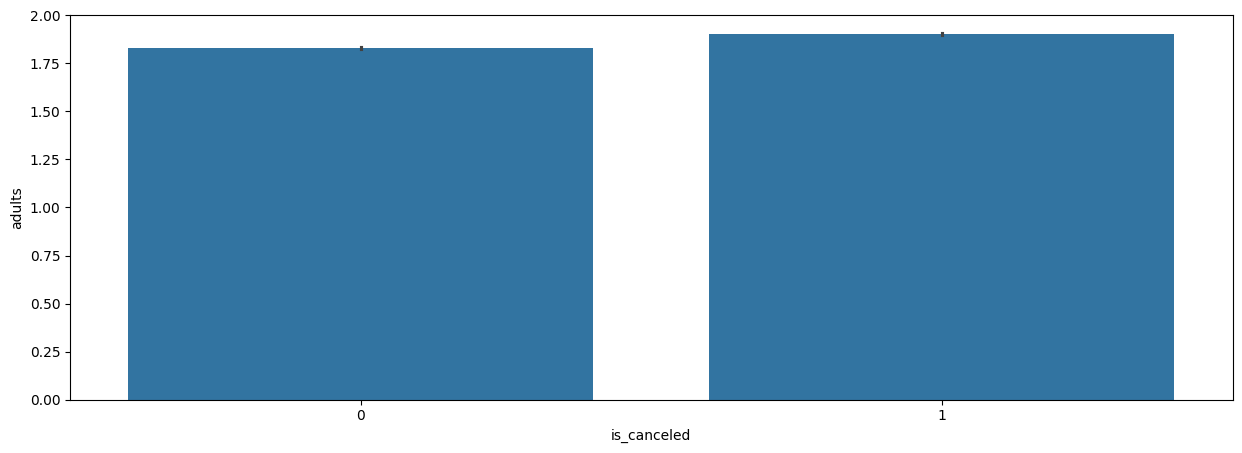

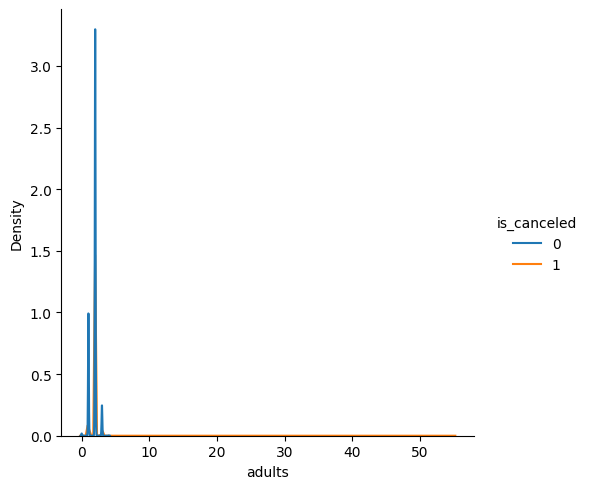

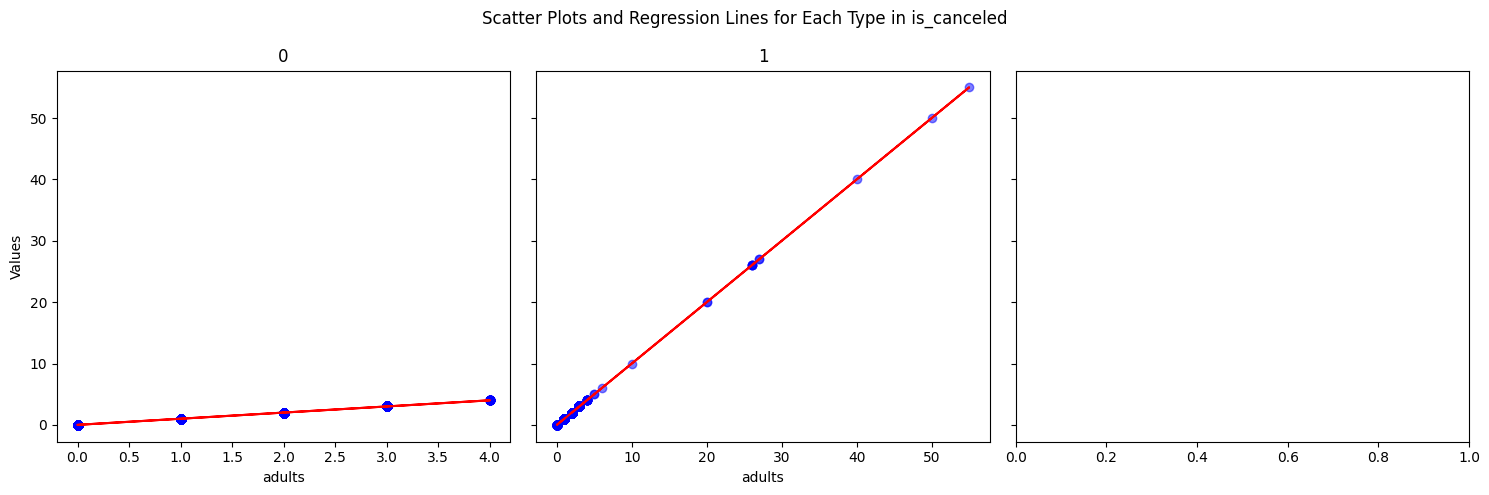

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

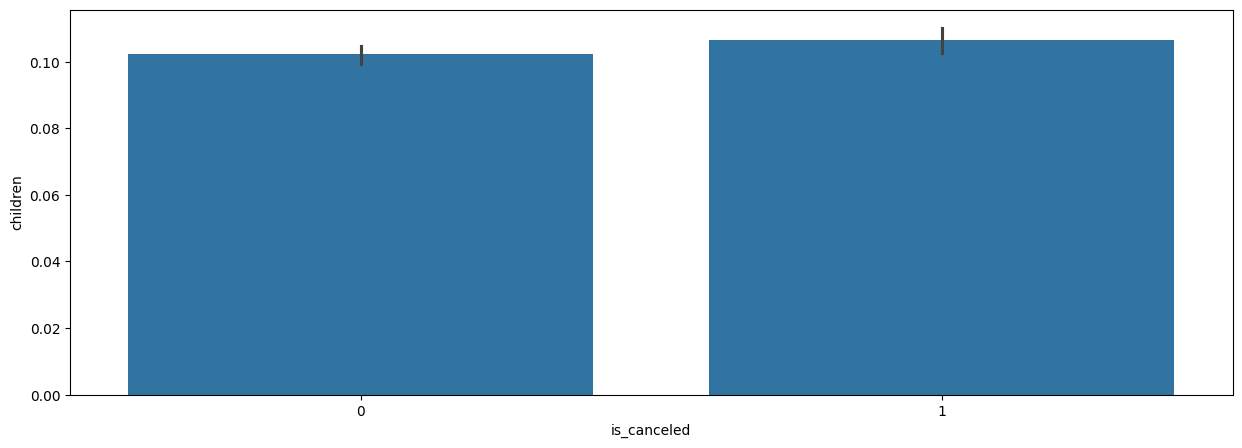

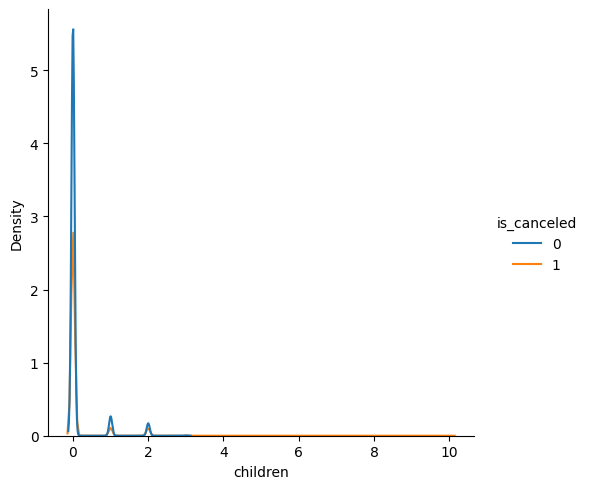

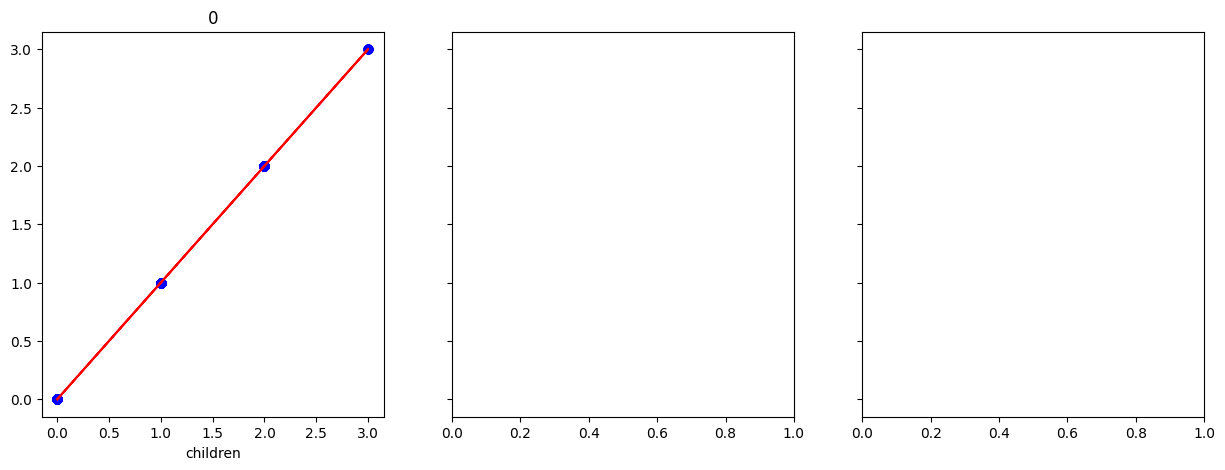

In [34]:
from sklearn.linear_model import LinearRegression

# Passo 2: Univariate Analysis (Distribution of individual features)
def bivariate_analysis(data, column_name):
    
    Objective_col = data_univariate.columns[1]

    # Visualization
    plt.figure(figsize=(15, 5))

    sns.barplot(data=data_univariate, x=Objective_col, y=column_name)
   # plt.savefig(f'bivariate_analysis/bar_plot_{column_name}.png')

    sns.displot(data=data_univariate, x= column_name, hue=Objective_col, kind="kde")
    #plt.savefig(f'bivariate_analysis/dis_plot_kde_{column_name}.png')

    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    # Get unique values in the last_col (your categorical variable)
    unique_types = data_univariate[Objective_col].unique()

   
   # Loop over each unique type and perform linear regression
    for i, t in enumerate(unique_types):
        # Filter data for the current type
        subset = data_univariate[data_univariate[Objective_col] == t]
        
        X = subset[column_name].values.reshape(-1, 1)
        y = subset[column_name].values
        model = LinearRegression()
        model.fit(X, y)
        
        m = model.coef_[0]
        b = model.intercept_
        
        axes[i].scatter(X, y, color='blue', alpha=0.5)
        
        axes[i].plot(X, model.predict(X), color='red', label=f'y = {m:.2f}x + {b:.2f}')
        
        # Set the title to show the current type and regression equation
        axes[i].set_title(f'{t}')
        axes[i].set_xlabel(column_name)

    # Set the common ylabel for the whole figure
    axes[0].set_ylabel('Values')

    # Display the plot
    plt.suptitle(f'Scatter Plots and Regression Lines for Each Type in {Objective_col}')
 

    plt.tight_layout()
    #plt.savefig(f'bivariate_analysis/scatter_plot_{column_name}.png')
    plt.show()



variables_to_analyse=data_univariate.columns

# Realizar a análise bivariada para cada variável
for variable in variables_to_analyse:
    bivariate_analysis(numerical_dt, variable)

